# Monitoraggio Dati COVID-19 Italia

© Copyright 2020, Pietro Di Gangi

Raw data sources:
* COVID-19 data from Dipartimento della Protezione Civile: https://github.com/pcm-dpc/COVID-19
* Population data from  ISTAT (01/01/2019)

In [96]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [97]:
%run init.py # notebook initialization
%run retrieve-data.ipynb # donwload and format DPC Covid data
data = pd.read_pickle('dataframes/mydata_dpc_ita.p') # national and regional dataframes
prov = pd.read_pickle('dataframes/mydata_dpc_ita_province.p') # province dataframe

Current time: 2020-08-24 07:18:12.142252


/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [98]:
#############################################
# Useful functions
#############################################
def sorted_set(regions, var):
    '''Ordina set rispetto alla variabile var'''
    df = data[data.region.isin(regions)][data.date==lastday].sort_values(var, ascending=False)
    sortedset = df.region.unique()
    return sortedset

def leglabels_style():
    '''Make legend labels colored'''
    leg._legend_box.align = "left"
    for line, text in zip(leg.get_lines(), leg.get_texts()):
        text.set_color(line.get_color())
        
def format_dateaxis():
    ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%-d %b %y'))
    fig.autofmt_xdate()
    plt.gcf().autofmt_xdate()

# Tabella Dati Nazionali e Regionali

In [99]:
lastday = data.date.iat[-1]
print('Dati aggiornati a:', lastday)

summary = data[data.date==lastday].sort_values('cases', ascending=False)
summary = summary[['region','cases','new_cases','deaths','new_deaths','terapia_intensiva','cases_per100k','deaths_per100k']]
summary['cases_per100k'] = summary['cases_per100k'].map('{:.1f}'.format)
summary['deaths_per100k'] = summary['deaths_per100k'].map('{:.1f}'.format)
summary.head(30)

Dati aggiornati a: 2020-08-23 17:00:00


region   cases  new_cases  deaths  new_deaths  \
181                  Italia  259345       1209   35437           7   
545                    Nord  206932        621   30321           5   
2365              Lombardia   98316        239   16856           4   
363                  Centro   34030        288    3575           1   
3275               Piemonte   32343         42    4143           0   
1637         Emilia-Romagna   30915        127    4456           1   
4549                 Veneto   21955        145    2104           0   
727                     Sud   18383        300    1541           1   
4003                Toscana   11175         59    1139           0   
2183                Liguria   10645         28    1571           0   
2001                  Lazio    9947        184     874           1   
2547                 Marche    7110          5     987           0   
1455               Campania    5722        138     441           1   
3093            P.A. Trento    5028          3     405           0   
3457                 Puglia    5025         33     555           0   
3821                Sicilia    4002         35     286           0   
909                 Abruzzo    3648         20     472           0   
1819  Friuli Venezia Giulia    3640         24     348           0   
2911           P.A. Bolzano    2869         13     292           0   
3639               Sardegna    1734         81     134           0   
4185                 Umbria    1639         19      80           0   
1273               Calabria    1398          8      97           0   
4367          Valle d'Aosta    1221          0     146           0   
2729                 Molise     511          1      23           0   
1091             Basilicata     502          5      28           0   

      terapia_intensiva cases_per100k deaths_per100k  
181                  69         428.7           58.6  
545                  36         745.5          109.2  
2365                 14         979.2          167.9  
363                  16         248.7           26.1  
3275                  5         738.4           94.6  
1637                  8         694.7          100.1  
4549                  4         447.1           42.9  
727                  17          96.5            8.1  
4003                  7         298.8           30.5  
2183                  1         682.4          100.7  
2001                  6         168.6           14.8  
2547                  1         464.7           64.5  
1455                  2          98.1            7.6  
3093                  1         929.4           74.9  
3457                  4         124.1           13.7  
3821                 10          80.0            5.7  
909                   1         276.4           35.8  
1819                  2         298.4           28.5  
2911                  1         540.3           55.0  
3639                  0         105.1            8.1  
4185                  1         185.2            9.0  
1273                  1          71.3            4.9  
4367                  0         969.0          115.9  
2729                  0         165.9            7.5  
1091                  0          88.5            4.9

# 1D Diagnostic Plots
Andamento delle singole variabili relative ai casi COVID-19 tramite grafici 1D.

## Valori normalizzati su popolazione: dati cumulati
Totale casi COVID-19 confermati per 100000 abitanti in Italia (Nord, Centro e Sud)
* Bars: i contributi delle singole aree sono sovrapposti

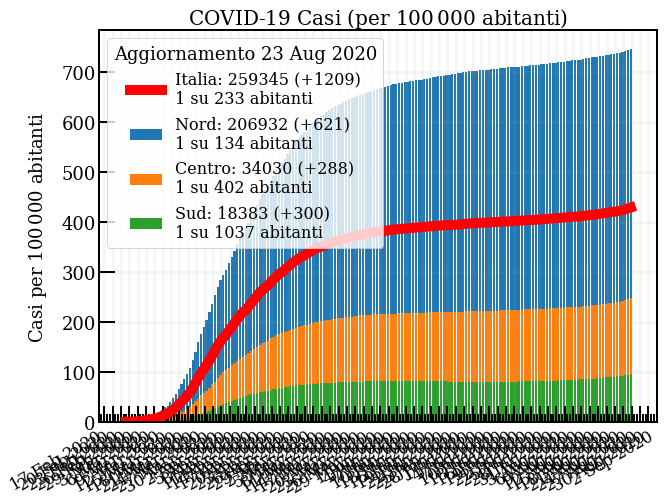

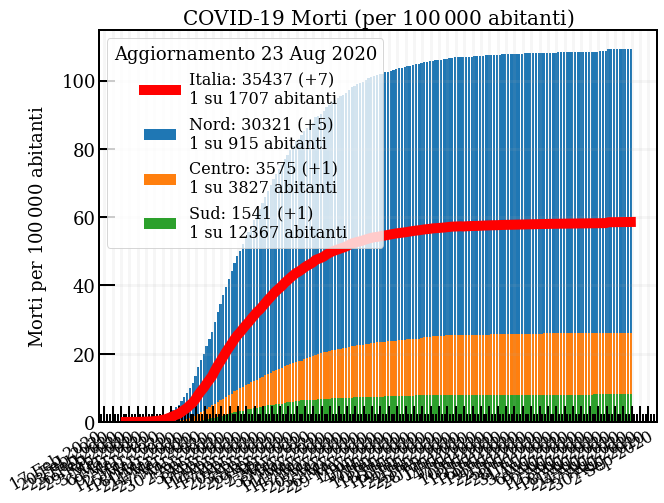

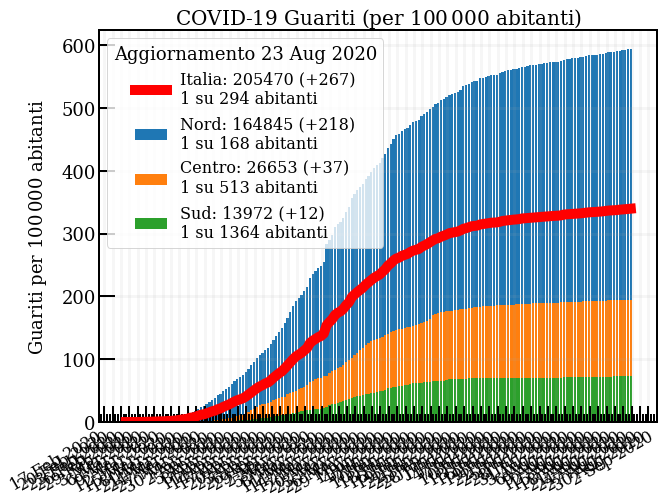

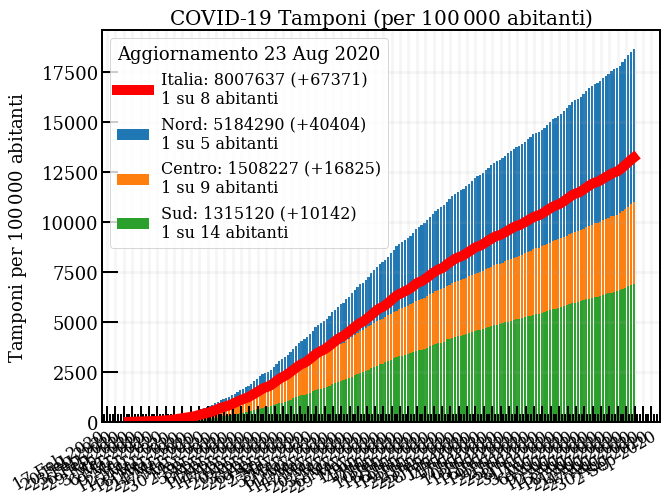

In [100]:
def cumulative_normalized(regions, var, title='', ylabel='y'):

    # figure
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)

    # selected sets
    N = len(regions)
    
    # plot data
    for i,reg in enumerate(regions):
        df = data[data.region==reg]
        pop = df['population'].iat[0]        
        tot = df[var].iat[-1]
        lb = '%s: %d (+%.f)' % (reg, tot, df['new_'+var].iat[-1])
        lb = lb + '\n1 su %.f abitanti' % (pop/tot)
        if reg=='Italia':
            ax.plot(df.date, df[var]/pop*1e5, label=lb, color='r', lw=10, ls='-')
        else:
            ax.bar(df.date, df[var]/pop*1e5, label=lb)

    # axes settings
    plt.ylabel(ylabel)
    plt.grid(axis='x', linewidth=3, alpha=0.1, which='major')
    plt.grid(axis='y', linewidth=3, alpha=0.1, which='both')
    ax.tick_params(axis='x', which='major', labelsize=16)
    ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%-d %b %Y'))
    fig.autofmt_xdate()
    plt.gcf().autofmt_xdate()
    
    #legend
    leg = plt.legend(loc='upper left',fontsize=16, title='Aggiornamento %s' % lastday.strftime('%-d %b %Y')) 
    plt.title(title, fontsize=20)
    
    plt.show()
    

regions = ['Nord', 'Centro', 'Sud','Italia']
cumulative_normalized(regions, 'cases', title='COVID-19 Casi (per 100$\,$000 abitanti)', ylabel='Casi per 100$\,$000 abitanti')
cumulative_normalized(regions, 'deaths', title='COVID-19 Morti (per 100$\,$000 abitanti)', ylabel='Morti per 100$\,$000 abitanti')
cumulative_normalized(regions, 'recovered', title='COVID-19 Guariti (per 100$\,$000 abitanti)', ylabel='Guariti per 100$\,$000 abitanti')
cumulative_normalized(regions, 'tests', title='COVID-19 Tamponi (per 100$\,$000 abitanti)', ylabel='Tamponi per 100$\,$000 abitanti')

## Valori normalizzati su popolazione: dati differenziali
Nuovi casi giornalieri COVID-19 per 100000 abitanti in Italia (Nord, Centro e Sud)

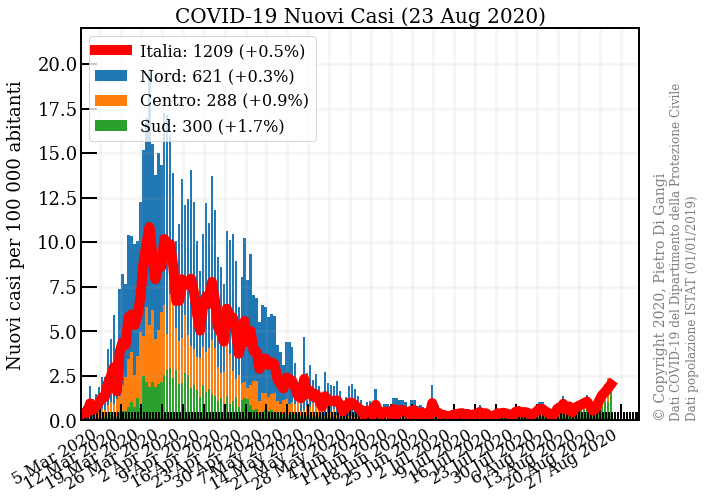

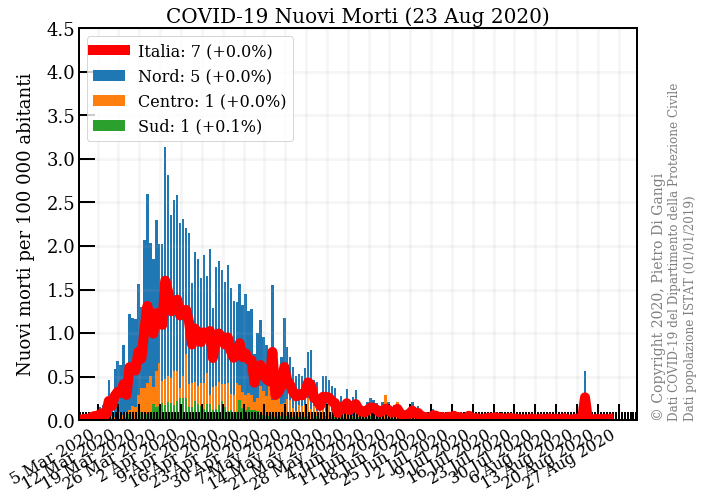

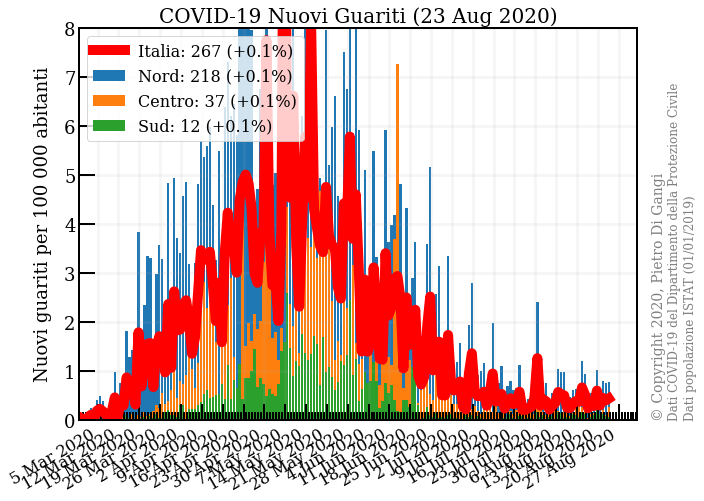

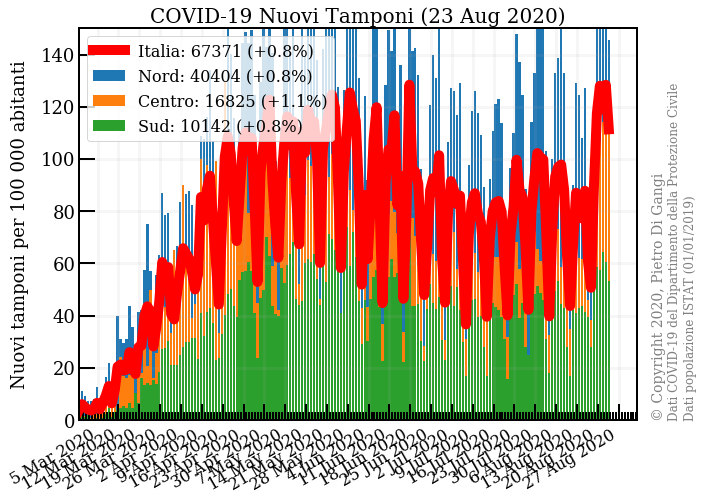

In [101]:
def differential_normalized(regions, var, title='', ylabel='y per 100 000 abitanti', ymax=100):
    cumvar = var.replace("new_", "")

    # figure
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)

    # selected sets
    N = len(regions)
    
    # plot data
    for i,reg in enumerate(regions):
        df = data[data.region==reg]
        pop = df['population'].iat[0]        
        tot = df[var].iat[-1]
        lb = '%s: %.f (+%.1f%s)' % (reg, tot, df[cumvar+'_delta1'].iat[-1]*100, '%')
        if reg=='Italia':
            ax.plot(df.date, df[var]/pop*1e5, label=lb, color='r', lw=10, ls='-')
        else:
            ax.bar(df.date, df[var]/pop*1e5, label=lb)

    # axes settings
    ax.set_xlim(left = df.date.iat[3])
    ax.set_ylim(0, ymax)
    plt.ylabel(ylabel)
    plt.grid(axis='x', linewidth=3, alpha=0.1, which='major')
    plt.grid(axis='y', linewidth=3, alpha=0.1, which='both')
    ax.tick_params(axis='x', which='major', labelsize=16)
    ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%-d %b %Y'))
    fig.autofmt_xdate()
    plt.gcf().autofmt_xdate()
    
    #legend
    leg = plt.legend(loc='upper left',fontsize=16) 
    plt.title(title + ' (%s)' % lastday.strftime('%-d %b %Y'), fontsize=20)
    
    # disclaimer
    dayspan = df.date.iat[-1] - df.date.iat[0]
    text = '© Copyright 2020, Pietro Di Gangi'
    plt.text(lastday+0.08*dayspan, 0, text, rotation=90, verticalalignment='bottom', color='grey', fontsize=14)
    text = 'Dati COVID-19 del Dipartimento della Protezione Civile'
    plt.text(lastday+0.11*dayspan, 0, text, rotation=90, verticalalignment='bottom', color='grey', fontsize=12)
    text = 'Dati popolazione ISTAT (01/01/2019)'
    plt.text(lastday+0.14*dayspan, 0, text, rotation=90, verticalalignment='bottom', color='grey', fontsize=12)
    
    plt.show()
    

regions = ['Nord', 'Centro', 'Sud','Italia']
differential_normalized(regions, 'new_cases', 
                                  title = 'COVID-19 Nuovi Casi', 
                                  ylabel = 'Nuovi casi per 100 000 abitanti',
                                  ymax = 22
                                 )

differential_normalized(regions, 'new_deaths', 
                                  title = 'COVID-19 Nuovi Morti', 
                                  ylabel = 'Nuovi morti per 100 000 abitanti',
                                  ymax = 4.5
                                 )

differential_normalized(regions, 'new_recovered', 
                                  title = 'COVID-19 Nuovi Guariti', 
                                  ylabel = 'Nuovi guariti per 100 000 abitanti',
                                  ymax = 8
                                 )

differential_normalized(regions, 'new_tests', 
                                  title = 'COVID-19 Nuovi Tamponi', 
                                  ylabel = 'Nuovi tamponi per 100 000 abitanti',
                                  ymax = 150
                                 )

(0.0, 77701.0)


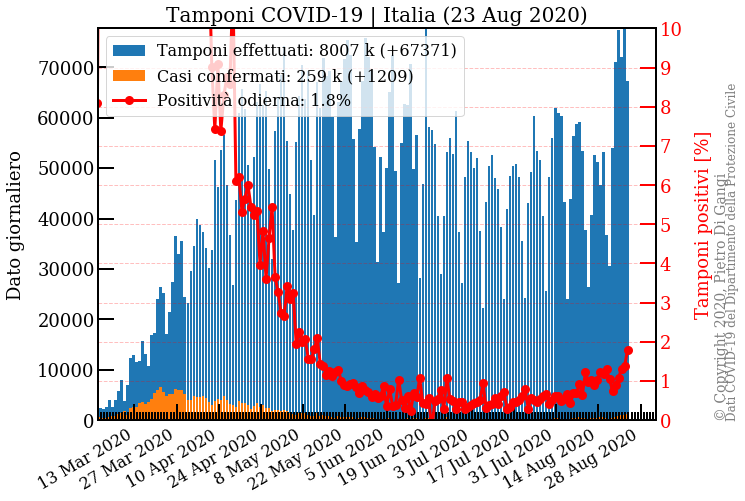

(0.0, 52582.0)


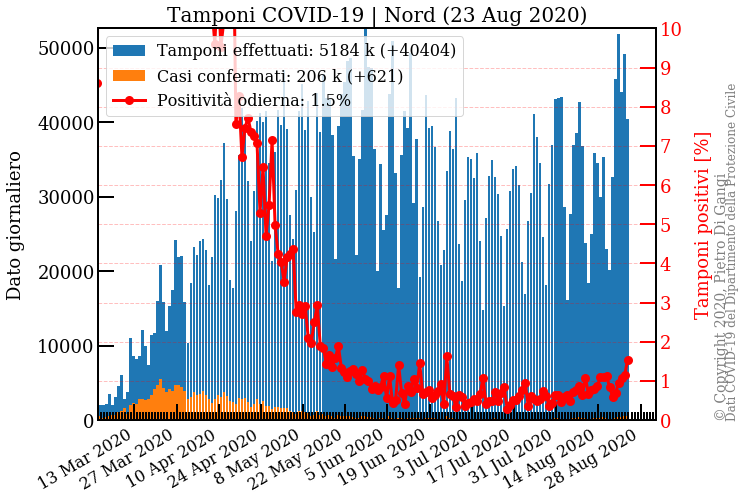

(0.0, 17788.0)


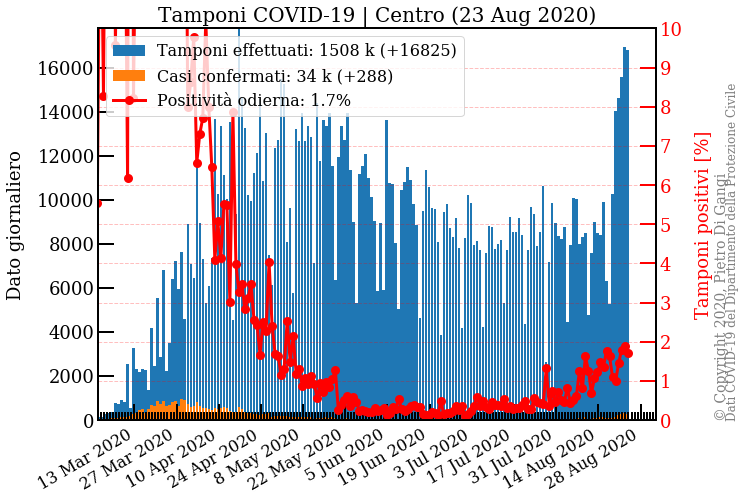

(0.0, 22683.0)


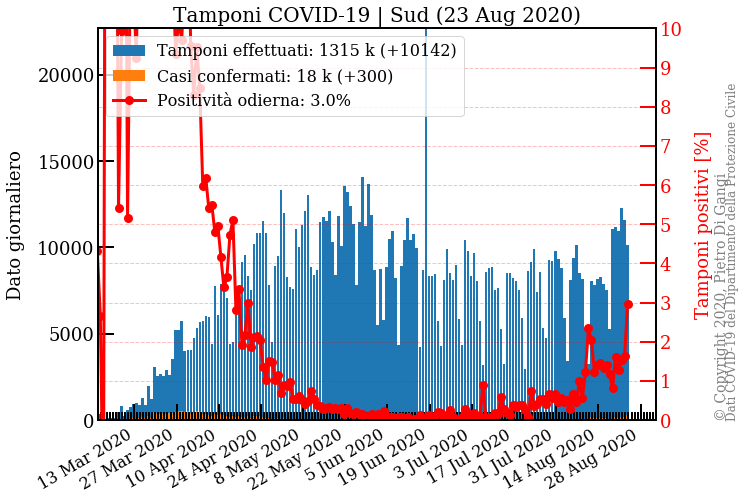

In [102]:
def positives_tests(region, title='', ylabel='y per 100 000 abitanti'):

    # figure
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax2 = ax.twinx()
    
    # plot data
    df = data[data.region==region]
    pop = df['population'].iat[0]  
    
    var = 'new_tests'
    cumvar = var.replace("new_", "")
    tot = df[var].iat[-1]
    lb1 = 'Tamponi effettuati: %d k (+%d)' % (df[cumvar].iat[-1]/1000, df[var].iat[-1])
    b1 = ax.bar(df.date, df[var], label=lb1)
    
    ax.set_ylim(0, max(df[var]))
    print(ax.get_ylim())
    
    var = 'new_cases'
    cumvar = var.replace("new_", "")
    tot = df[var].iat[-1]
    lb2 = 'Casi confermati: %d k (+%d)' % (df[cumvar].iat[-1]/1000, df[var].iat[-1])
    b2 = ax.bar(df.date, df[var], label=lb2)
    

    
    lb3 = 'Positività odierna: %.1f%s' % (df['new_cases'].iat[-1]/df['new_tests'].iat[-1]*100, '%')
    l, = ax2.plot(df.date, df['new_cases']/df['new_tests']*100, label=lb3, color='r', marker='.', lw=3)

    # axes settings

    ax2.set_ylabel('Tamponi positivi [%]', color='r')
    ax2.tick_params(colors='r')
    ax2.set_yticks(np.arange(0,55,1))
    ax2.set_ylim(0,10)
    ax2.grid(axis='y', linewidth=1, alpha=0.25, color='r', ls='--', which='both')
    
    ax.set_xlim(datetime.datetime(2020,3,1))
    ax.set_ylabel('Dato giornaliero')
    ax.tick_params(axis='x', which='major', labelsize=16)
    ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=14))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%-d %b %Y'))
    fig.autofmt_xdate()
    plt.gcf().autofmt_xdate()
    
    #legend
    handles = [b1, b2, l]
    labels = [lb1, lb2, lb3]
    plt.legend(handles, labels, loc='upper left')
    #leg = ax.legend(loc='upper left',fontsize=16) 
    plt.title(title + '%s (%s)' % (region,lastday.strftime('%-d %b %Y')), fontsize=20)
    
    # disclaimer
    dayspan = df.date.iat[-1] - df.date.iat[0]
    text = '© Copyright 2020, Pietro Di Gangi'
    plt.text(lastday+0.16*dayspan, 0, text, rotation=90, verticalalignment='bottom', color='grey', fontsize=14)
    text = 'Dati COVID-19 del Dipartimento della Protezione Civile'
    plt.text(lastday+0.18*dayspan, 0, text, rotation=90, verticalalignment='bottom', color='grey', fontsize=12)
    
    plt.show()
    

positives_tests('Italia', 'Tamponi COVID-19 | ')
positives_tests('Nord', 'Tamponi COVID-19 | ')
positives_tests('Centro', 'Tamponi COVID-19 | ')
positives_tests('Sud', 'Tamponi COVID-19 | ')

## Valori assoluti: dati cumulati
Numero assoluto di casi COVID-19 confermati in Italia (Nord, Centro e Sud)
* Casi confermati
* Morti
* Guariti
* Tamponi effettuati

**Tipologia grafico**: Stacked bars - I contributi delle diverse aree sono impilati uno sopra l'altro

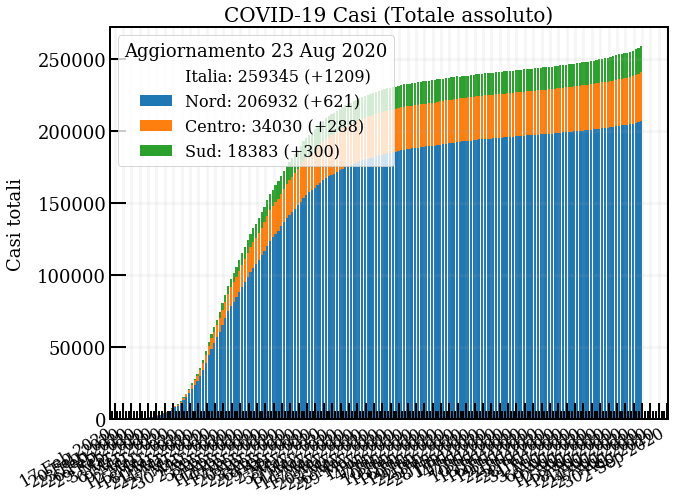

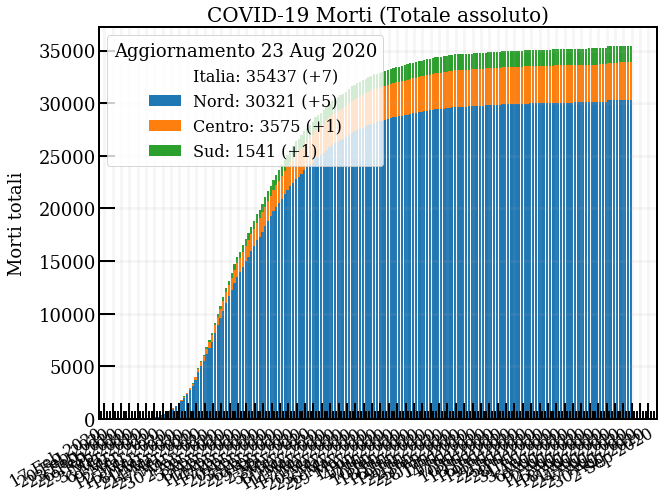

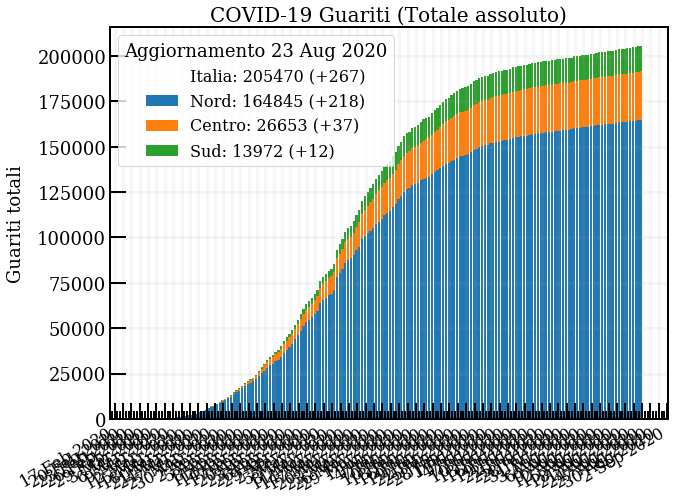

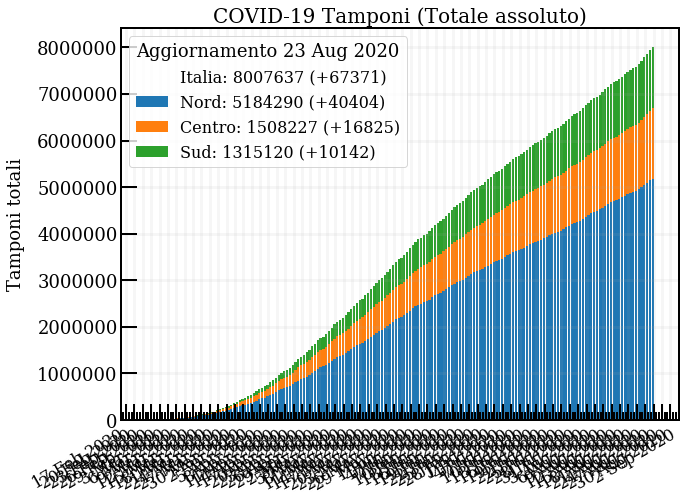

In [103]:
def cumulative(regions, colors, var, title='', ylabel='y'):

    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)

    regions = ['Nord', 'Centro', 'Sud']
    colors = ['tab:blue', "tab:orange","tab:green"]
    N = len(regions)

    df = data[data.region==regions[0]]
    margin_bottom = np.zeros(len(df['date'].drop_duplicates()))
    for i,reg in enumerate(regions):
        df = data[data.region==reg]
        tot = df[var].iat[-1]
        lb = '%s: %d (+%.f)' % (reg, tot, df['new_'+var].iat[-1])

        values = list(df[var])
        ax.bar(df.date, df[var], bottom=margin_bottom, label=lb)
        margin_bottom += values
    
    df = data[data.region=='Italia']
    lb = 'Italia: %d (+%.f)' % (df[var].iat[-1], df['new_'+var].iat[-1])
    ax.plot(df.date, df[var], label=lb, color='r', lw=5, ls='-', alpha=0)
    
    plt.ylabel(ylabel)
    plt.grid(axis='x', linewidth=3, alpha=0.1, which='major')
    plt.grid(axis='y', linewidth=3, alpha=0.1, which='both')
    ax.tick_params(axis='x', which='major', labelsize=16)
    
    ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%-d %b %Y'))
    fig.autofmt_xdate()
    plt.gcf().autofmt_xdate()
    
    #legend
    leg = plt.legend(loc='upper left',fontsize=16, title='Aggiornamento %s' % lastday.strftime('%-d %b %Y')) 
    plt.title(title, fontsize=20)
    
    plt.show()
    
regions = ['Nord', 'Centro', 'Sud']
colors = ['tab:blue', "tab:orange","tab:green"]    
cumulative(regions, colors, 'cases', title='COVID-19 Casi (Totale assoluto)', ylabel='Casi totali')
cumulative(regions, colors, 'deaths', title='COVID-19 Morti (Totale assoluto)', ylabel='Morti totali')
cumulative(regions, colors, 'recovered', title='COVID-19 Guariti (Totale assoluto)', ylabel='Guariti totali')
cumulative(regions, colors, 'tests', title='COVID-19 Tamponi (Totale assoluto)', ylabel='Tamponi totali')

## Valori assoluti: dati differenziali
Variazione assoluta giornaliera di casi COVID-19 in Italia (Nord, Centro e Sud).
* Stacked bars: i contributi delle diverse aree sono impilati uno sopra l'altro

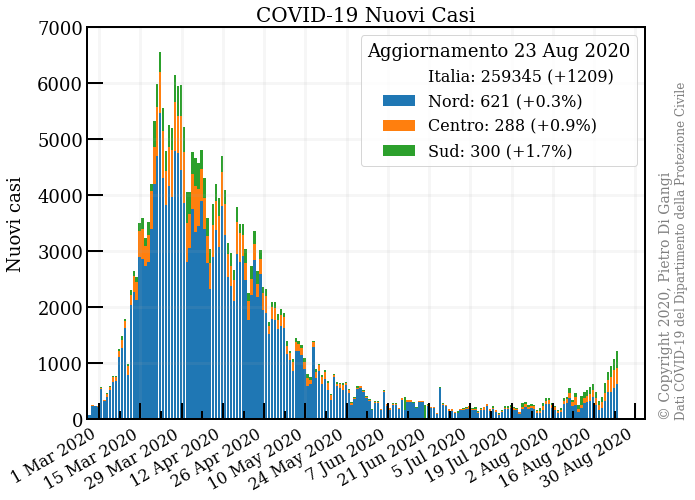

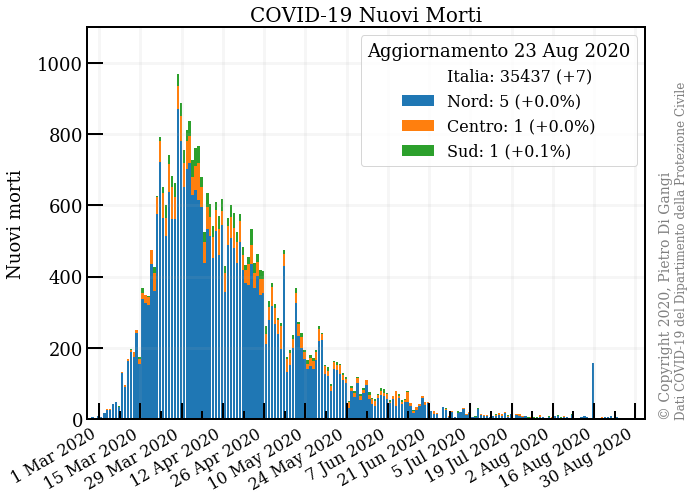

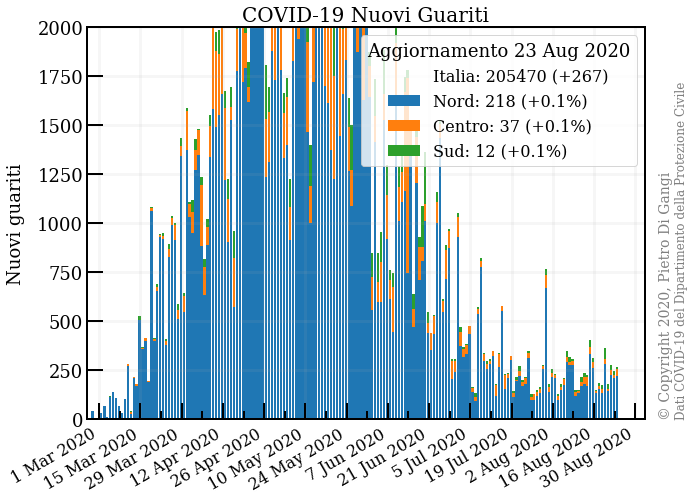

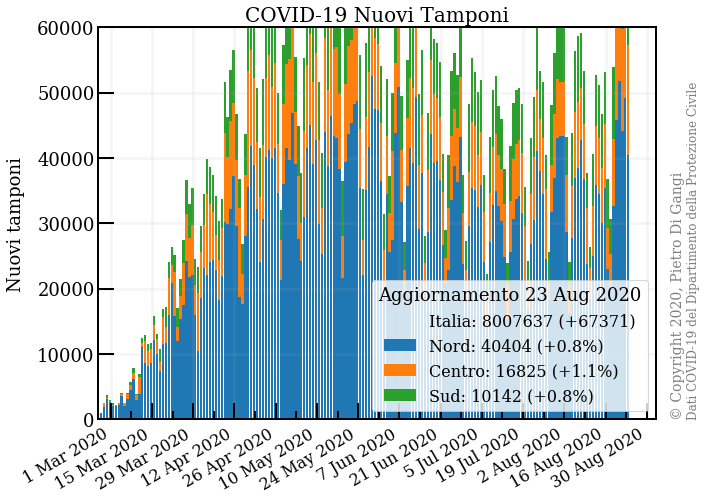

In [104]:
def differential(regions, var, title='', ylabel='y', ymax=100):
    cumvar = var.replace("new_", "")

    # figure
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)

    # selected sets
    N = len(regions)    
    
    # plot data
    df = data[data.region==regions[0]]
    margin_bottom = np.zeros(len(df['date'].drop_duplicates()))
    for i,reg in enumerate(regions):
        df = data[data.region==reg]
        tot = df[var].iat[-1]
        lb = '%s: %.f (+%.1f%s)' % (reg, tot, df[cumvar+'_delta1'].iat[-1]*100, '%')
        
        values = list(df[var])
        ax.bar(df.date, df[var], bottom=margin_bottom, label=lb)
        margin_bottom += values
    
    df = data[data.region=='Italia']
    lb = 'Italia: %d (+%.f)' % (df[cumvar].iat[-1], df[var].iat[-1])
    ax.plot(df.date, df[var], label=lb, color='r', lw=5, ls='-', alpha=0)

    # axes settings
    ax.set_xlim(left = df.date.iat[1])
    ax.set_ylim(0,ymax)
    plt.ylabel(ylabel)
    plt.grid(axis='x', linewidth=3, alpha=0.1, which='major')
    plt.grid(axis='y', linewidth=3, alpha=0.1, which='both')
    ax.tick_params(axis='x', which='major', labelsize=16)
    ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7))
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=14))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%-d %b %Y'))
    fig.autofmt_xdate()
    plt.gcf().autofmt_xdate()
    
    #legend
    leg = plt.legend(loc=0,fontsize=16, title='Aggiornamento %s' % lastday.strftime('%-d %b %Y')) 
    plt.title(title, fontsize=20)
    
    # disclaimer
    dayspan = df.date.iat[-1] - df.date.iat[0]
    text = '© Copyright 2020, Pietro Di Gangi'
    plt.text(lastday+0.08*dayspan, 0, text, rotation=90, verticalalignment='bottom', color='grey', fontsize=14)
    text = 'Dati COVID-19 del Dipartimento della Protezione Civile'
    plt.text(lastday+0.11*dayspan, 0, text, rotation=90, verticalalignment='bottom', color='grey', fontsize=12)
    
    plt.show()
    
regions = ['Nord', 'Centro', 'Sud']    
differential(regions, 'new_cases', 
                                  title = 'COVID-19 Nuovi Casi', 
                                  ylabel = 'Nuovi casi',
                                  ymax = 7000
                                 )

differential(regions, 'new_deaths', 
                                  title = 'COVID-19 Nuovi Morti', 
                                  ylabel = 'Nuovi morti',
                                  ymax = 1100
                                 )

differential(regions, 'new_recovered', 
                                  title = 'COVID-19 Nuovi Guariti', 
                                  ylabel = 'Nuovi guariti',
                                  ymax = 2000
                                 )

differential(regions, 'new_tests', 
                                  title = 'COVID-19 Nuovi Tamponi', 
                                  ylabel = 'Nuovi tamponi',
                                  ymax = 60000
                                 )

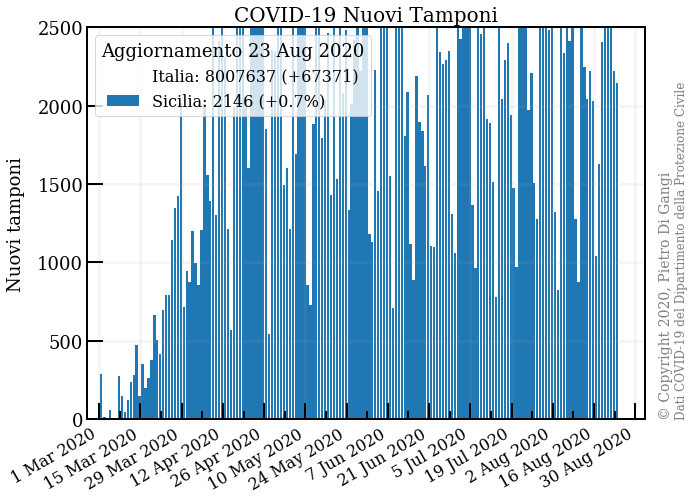

In [105]:
differential(['Sicilia'], 'new_tests', 
                                  title = 'COVID-19 Nuovi Tamponi', 
                                  ylabel = 'Nuovi tamponi',
                                  ymax = 2500
                                 )

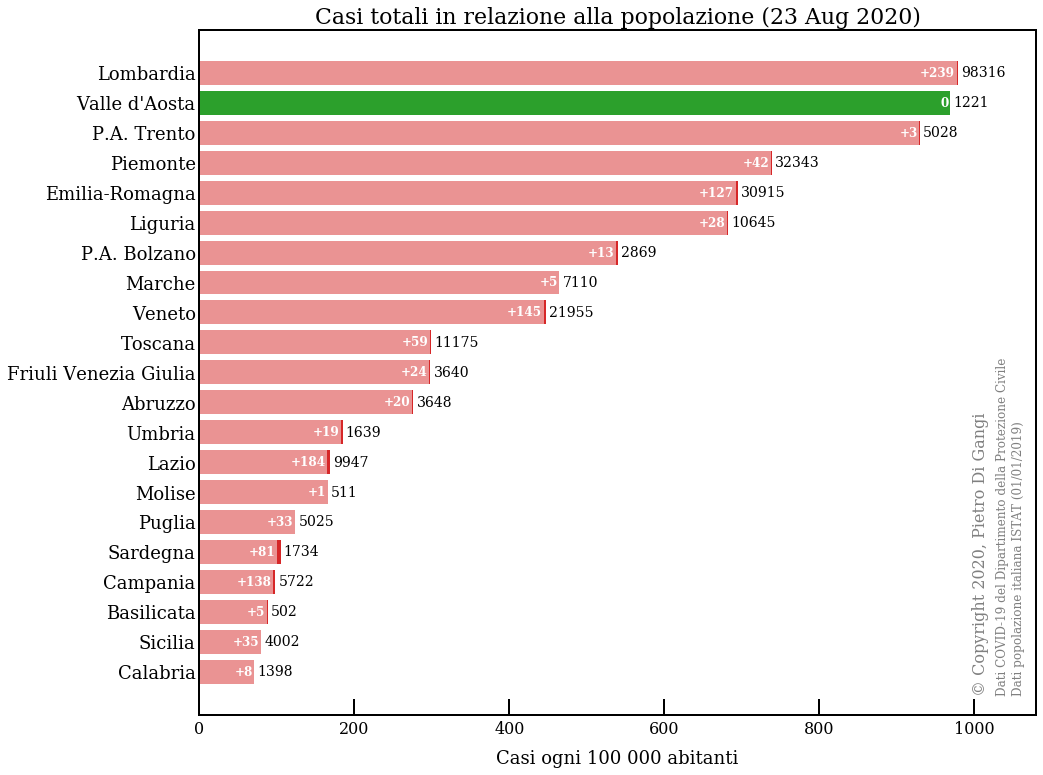

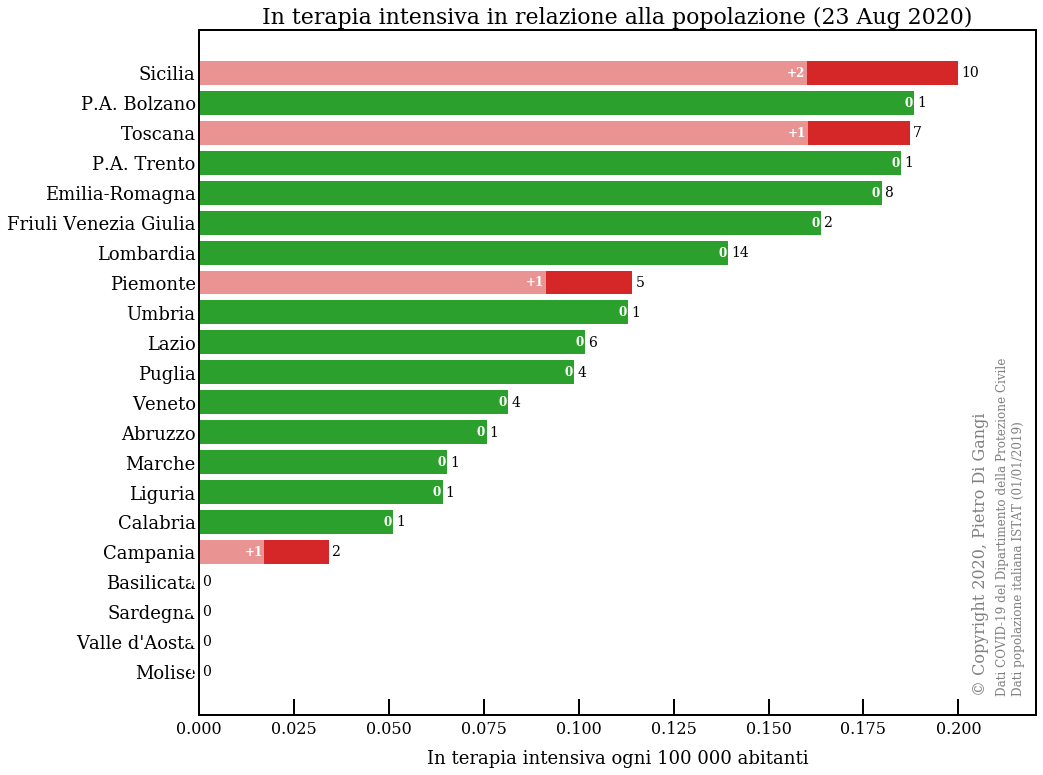

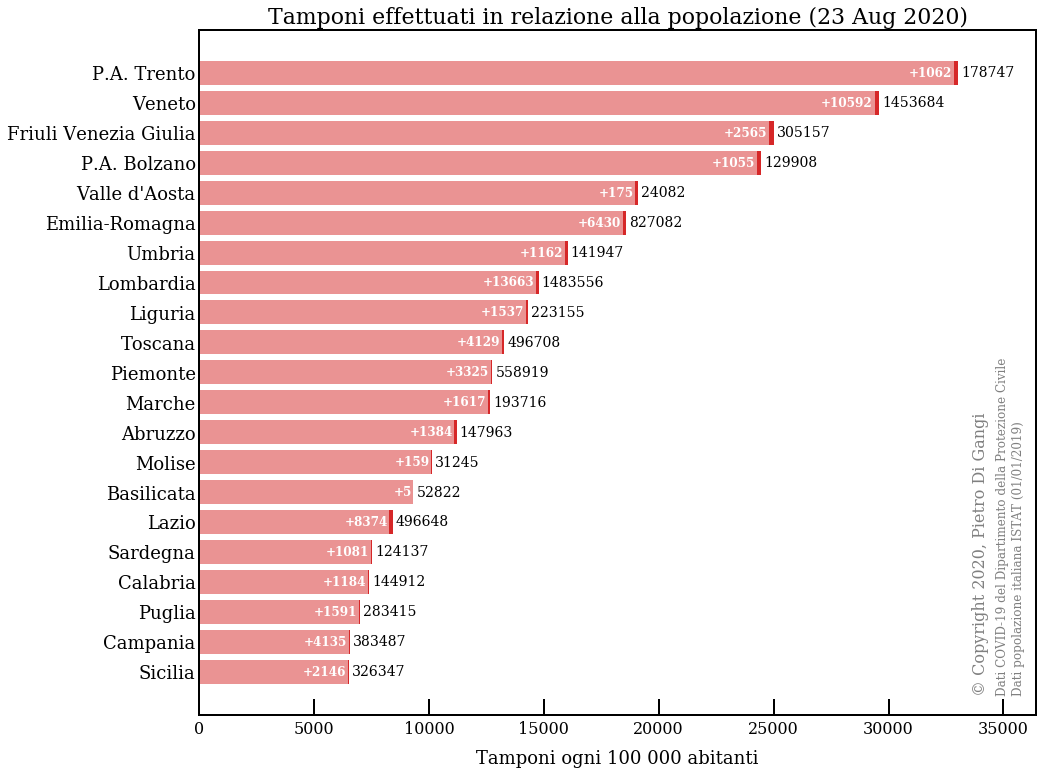

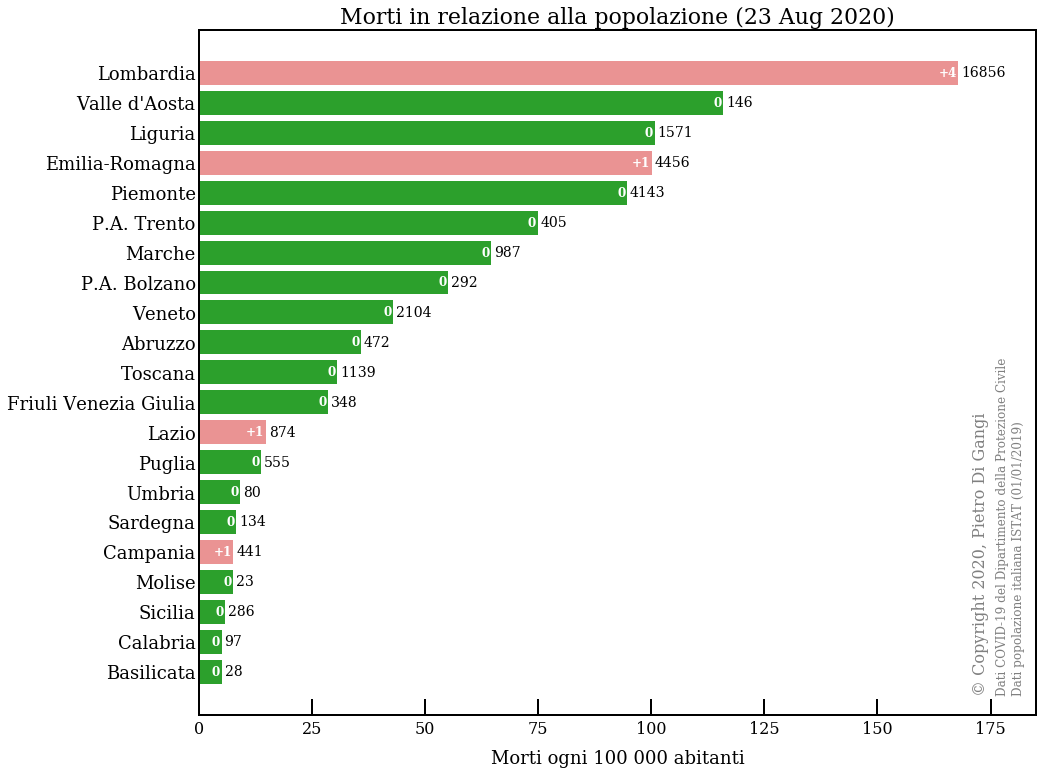

In [106]:
def standing_normalized(states, var, title='', xlabel='x'):

    n = len(states)*0.1
    
    fig = plt.figure(figsize=(15,6*n))
    ax = fig.add_subplot(111)
    ax.tick_params(left=False) 
    xmax = data[data.region==states[0]][var+'_per100k'].iat[-1]
    #states = sorted_states(states, var+'_per100k')
    states = states[::-1]
    
    for i,state in enumerate(states):
        df = data[data.region==state]
        pop = data.population.iat[0]
        tot = df[var].iat[-1]
        today = df[var+'_per100k'].iat[-1]
        yesterday = df[var+'_per100k'].iat[-2]
        if today>yesterday:
            ax.barh(state, df[var+'_per100k'].iat[-1], color='tab:red', label='', alpha=1)
            ax.barh(state, df[var+'_per100k'].iat[-2], color='white', label='', alpha=0.5)        
            lb = '%d' % (tot)
            ax.text(df[var+'_per100k'].iat[-1]+2*xmax/500, state, lb, ha='left', va='center', fontsize=14)
            ax.text(df[var+'_per100k'].iat[-2]-1*xmax/500, state, ('+%d' % df['new_'+var].iat[-1]), ha='right', va='center', color='w', fontsize=12, weight='bold')
        else:
            ax.barh(state, df[var+'_per100k'].iat[-2], color='tab:green', label='', alpha=0.5)
            ax.barh(state, df[var+'_per100k'].iat[-1], color='tab:green', label='', alpha=1)
            lb = '%d' % (tot)
            ax.text(df[var+'_per100k'].iat[-1]+2*xmax/500, state, lb, ha='left', va='center', fontsize=14)
            ax.text(df[var+'_per100k'].iat[-1]-1*xmax/500, state, ('%d' % df['new_'+var].iat[-1]), ha='right', va='center', color='w', fontsize=12, weight='bold')
            
    plt.xlabel(xlabel)
    #ax.grid(axis='x', linewidth=2, alpha=0.1, which='major')
    ax.tick_params(axis='x', which='major', labelsize=16)
    
    xmin, xmax = ax.get_xlim() 
    ax.set_xlim(0,xmax*1.05)
    
    #legend
    plt.title(title+' (%s)' % lastday.strftime('%-d %b %Y'), fontsize=22)
    
    # disclaimer
    text = '© Copyright 2020, Pietro Di Gangi'
    plt.text(0.97*xmax, -0.8, text, rotation=90, verticalalignment='bottom', color='grey', fontsize=16)
    text = 'Dati COVID-19 del Dipartimento della Protezione Civile'
    plt.text(1.00*xmax, -0.8, text, rotation=90, verticalalignment='bottom', color='grey', fontsize=12)
    text = 'Dati popolazione italiana ISTAT (01/01/2019)'
    plt.text(1.02*xmax, -0.8, text, rotation=90, verticalalignment='bottom', color='grey', fontsize=12)

    plt.show()       

        
states = data[(data.region.isin(nord+centro+sud))&(data.date==lastday)].sort_values('cases_per100k', ascending=False).region.unique()
standing_normalized(states, 'cases', 'Casi totali in relazione alla popolazione', 'Casi ogni 100 000 abitanti')

states = data[(data.region.isin(nord+centro+sud))&(data.date==lastday)].sort_values('terapia_intensiva_per100k', ascending=False).region.unique()
standing_normalized(states, 'terapia_intensiva', 'In terapia intensiva in relazione alla popolazione', 'In terapia intensiva ogni 100 000 abitanti')

states = data[(data.region.isin(nord+centro+sud))&(data.date==lastday)].sort_values('tests_per100k', ascending=False).region.unique()
standing_normalized(states, 'tests', 'Tamponi effettuati in relazione alla popolazione', 'Tamponi ogni 100 000 abitanti')

states = data[(data.region.isin(nord+centro+sud))&(data.date==lastday)].sort_values('deaths_per100k', ascending=False).region.unique()
standing_normalized(states, 'deaths', 'Morti in relazione alla popolazione', 'Morti ogni 100 000 abitanti')

# Overview COVID-19
Dati cumulati (valore accumulato fino ad oggi):
* Tamponi effettuati
* Casi confermati
* Dimessi guariti
* Morti

Dati attuali (valore registrato oggi):
* Attualmente positivi
* Ospedalizzati
* Ricoverati con sintomi
* In isolamento domiciliare
* In terapia intensiva

## Italia
Andamento e valori complessivi in Italia (Nord, Centro, Sud)

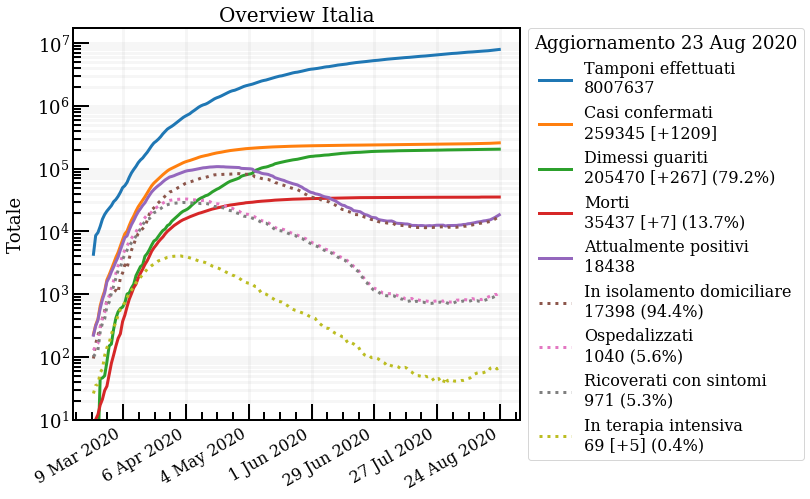

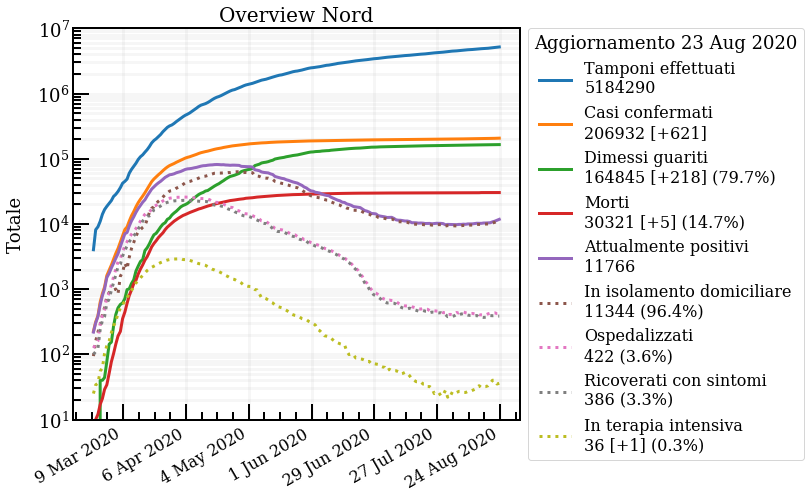

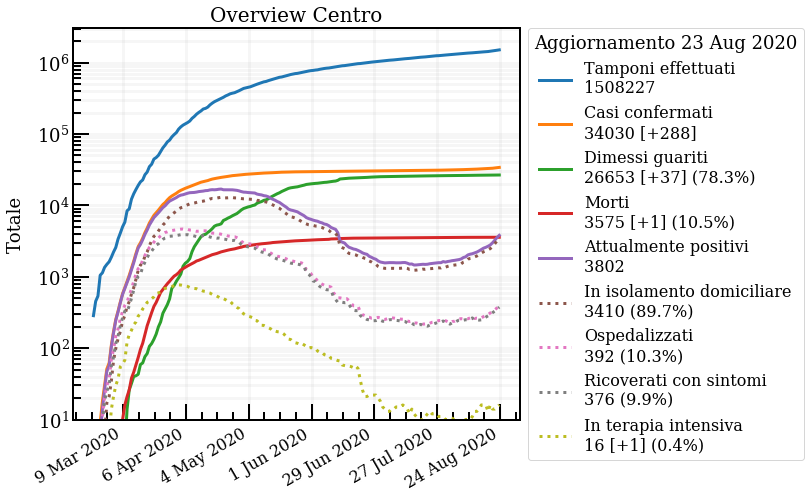

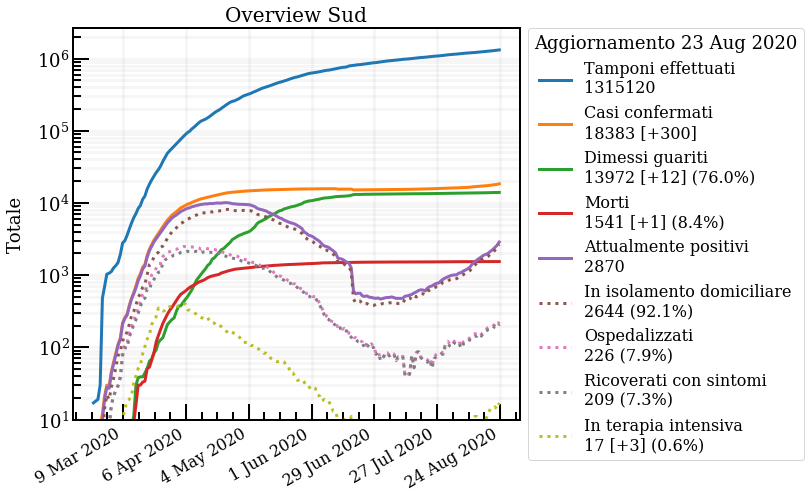

In [107]:
def overview(region, title=''):

    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
   
    df = data[data.region==region]
    # dati cumulati
    ax.plot(df.date, df.tests, label='Tamponi effettuati\n%d' % df.tests.iat[-1])
    lb = 'Casi confermati\n%d [+%.f]' % (df.cases.iat[-1], df.new_cases.iat[-1])
    #lb = lb + ' (%.1f%s)' % (df.cases.iat[-1]/df.tests.iat[-1]*100, '%')
    ax.plot(df.date, df.cases, label=lb)
    lb = 'Dimessi guariti\n%d [+%.f]' % (df.recovered.iat[-1], df.new_recovered.iat[-1])
    lb = lb + ' (%.1f%s)' % (df.recovered.iat[-1]/df.cases.iat[-1]*100, '%')
    ax.plot(df.date, df.recovered, label=lb)
    lb = 'Morti\n%d [+%.f]' % (df.deaths.iat[-1], df.new_deaths.iat[-1])
    lb = lb + ' (%.1f%s)' % (df.deaths.iat[-1]/df.cases.iat[-1]*100, '%')
    ax.plot(df.date, df.deaths, label=lb)
    
    # dati attuali
    ax.plot(df.date, df.totale_positivi, label='Attualmente positivi\n%d ' % df.totale_positivi.iat[-1])
    tot = df.isolamento_domiciliare.iat[-1]
    pc = tot/df.totale_positivi.iat[-1]
    ax.plot(df.date, df.isolamento_domiciliare, ls=':', label='In isolamento domiciliare\n%d (%.1f%s)' % (tot, pc*100, '%'))
    tot = df.totale_ospedalizzati.iat[-1]
    pc = tot/df.totale_positivi.iat[-1]
    ax.plot(df.date, df.totale_ospedalizzati, ls=':', label='Ospedalizzati\n%d (%.1f%s)' % (tot, pc*100, '%'))
    tot = df.ricoverati_con_sintomi.iat[-1]
    pc = tot/df.totale_positivi.iat[-1]
    ax.plot(df.date, df.ricoverati_con_sintomi, ls=':', label='Ricoverati con sintomi\n%d (%.1f%s)' % (tot, pc*100, '%'))
    tot = df.terapia_intensiva.iat[-1]
    pc = tot/df.totale_positivi.iat[-1]
    new = df.new_terapia_intensiva.iat[-1]
    ax.plot(df.date, df.terapia_intensiva, ls=':', label='In terapia intensiva\n%d [%+.f] (%.1f%s)' % (tot, new, pc*100, '%'))
    
    plt.ylabel('Totale')
    plt.yscale('log')
    ax.set_ylim(bottom=10)
    plt.grid(axis='x', linewidth=3, alpha=0.1, which='major')
    plt.grid(axis='y', linewidth=3, alpha=0.1, which='both')
    ax.tick_params(axis='x', which='major', labelsize=16)
    
    ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7))
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=28))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%-d %b %Y'))
    fig.autofmt_xdate()
    plt.gcf().autofmt_xdate()
    
    #legend
    leg = plt.legend(loc='upper left',fontsize=16, bbox_to_anchor=(1.,1.02), title='Aggiornamento %s' % lastday.strftime('%-d %b %Y')) 
    plt.title(title, fontsize=20)
    
    plt.show()
    

regions = ['Nord', 'Centro', 'Sud']
overview('Italia', 'Overview Italia')
for area in ['Nord', 'Centro', 'Sud']:
    overview(area, 'Overview '+area)

## Evoluzione giornaliera della situazione ospedaliera
Aumento giornaliero di:
* Casi confermati
* Morti
* Dimessi guariti
* Nuovi ricoveri in terapia intensiva (TI) *

Variazione giornaliera di:
* Persone attualmente positive
* Persone ricoverate in ospedale
* Persone ricoverate in terapia intensiva

(*) I nuovi ingressi giornalieri in terapia intensiva sono stimati sulla base della variazione di posti di TI attualmente occupati, morti e guariti. In questo modo si tiene conto dei posti di TI liberati ogni giorno, stimati sotto le seguenti assunzioni:
* Posto di TI liberato per morte - I morti di oggi si trovavano in terapia intensiva il giorno precedente
* Posto di TI liberato per guarigione - Fra i dimessi guariti di oggi, una frazione uguale a ricoveri_terapia_intensiva/ricoveri (riscontrata il giorno precedente) era ricoverata in terapia intensiva


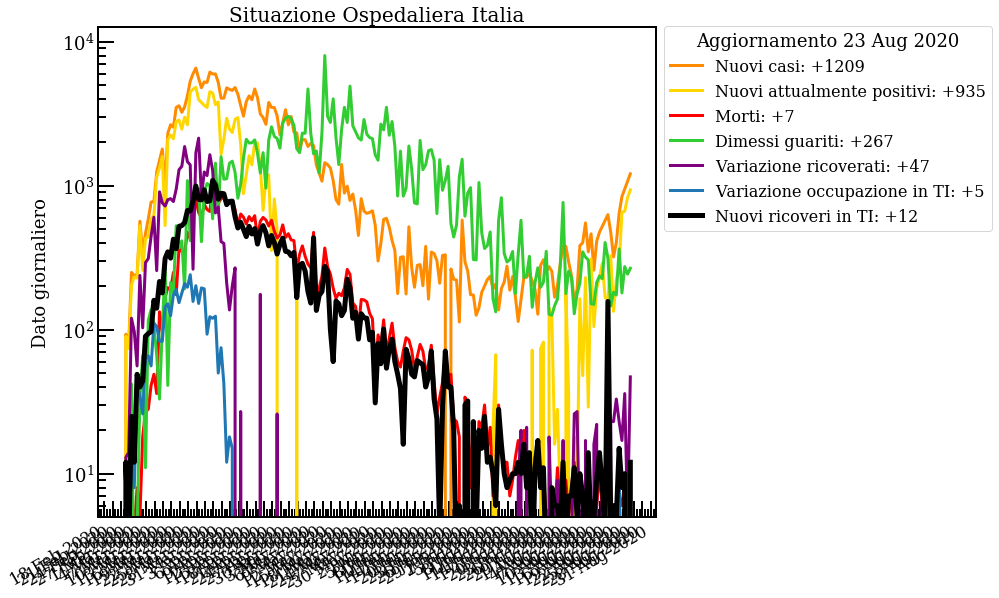

In [108]:
def malati(region, title=''):

    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
   
    df = data[data.region==region]
    
    ax.plot(df.date, df.new_cases, color='darkorange', label='Nuovi casi: +%d' % df.new_cases.iat[-1])
    ax.plot(df.date, df.new_totale_positivi, color='gold', label='Nuovi attualmente positivi: +%d' % df.new_totale_positivi.iat[-1])
    ax.plot(df.date, df.new_deaths, color='r', label='Morti: +%d' % df.new_deaths.iat[-1])
    ax.plot(df.date, df.new_recovered, color='limegreen', label='Dimessi guariti: +%d' % df.new_recovered.iat[-1])
    ax.plot(df.date, df.new_ricoverati_con_sintomi, color='purple', label='Variazione ricoverati: +%d' % df.new_ricoverati_con_sintomi.iat[-1])
    if df.new_terapia_intensiva.iat[-1]<0: sign=''
    else: sign='+'
    ax.plot(df.date, df.new_terapia_intensiva, color='tab:blue', label='Variazione occupazione in TI: %s%d' % (sign,df.new_terapia_intensiva.iat[-1]))
    ax.plot(df.date, df.new_terapia_intensiva_netta, lw=5, ls='-', color='k', label='Nuovi ricoveri in TI: +%d' % df.new_terapia_intensiva_netta.iat[-1])

    
    plt.ylabel('Dato giornaliero')
    plt.yscale('log')
    ax.set_ylim(bottom=5)
    ax.tick_params(axis='x', which='major', labelsize=16)
    
    ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%-d %b %Y'))
    fig.autofmt_xdate()
    plt.gcf().autofmt_xdate()
    
    #legend
    leg = plt.legend(loc='upper left', bbox_to_anchor=(1,1.02), fontsize=16, title='Aggiornamento %s' % lastday.strftime('%-d %b %Y')) 
    plt.title(title, fontsize=20)
    
    plt.show()
    

malati('Italia', 'Situazione Ospedaliera Italia')

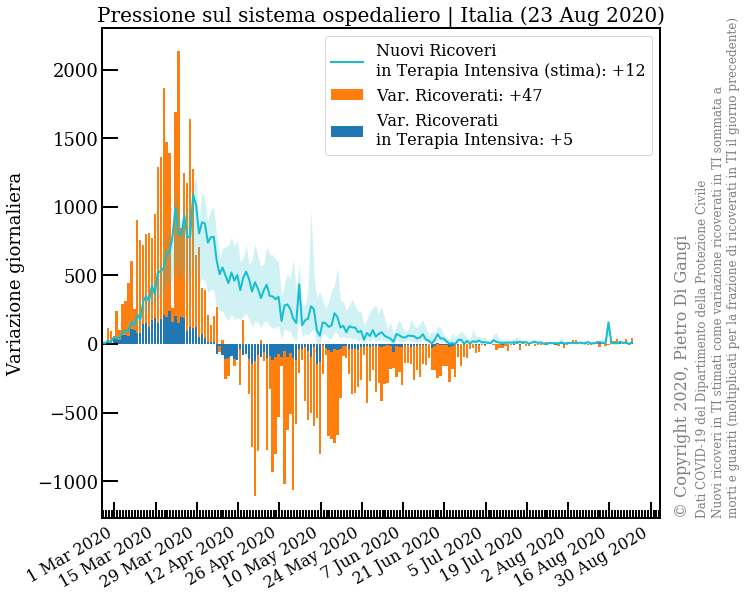

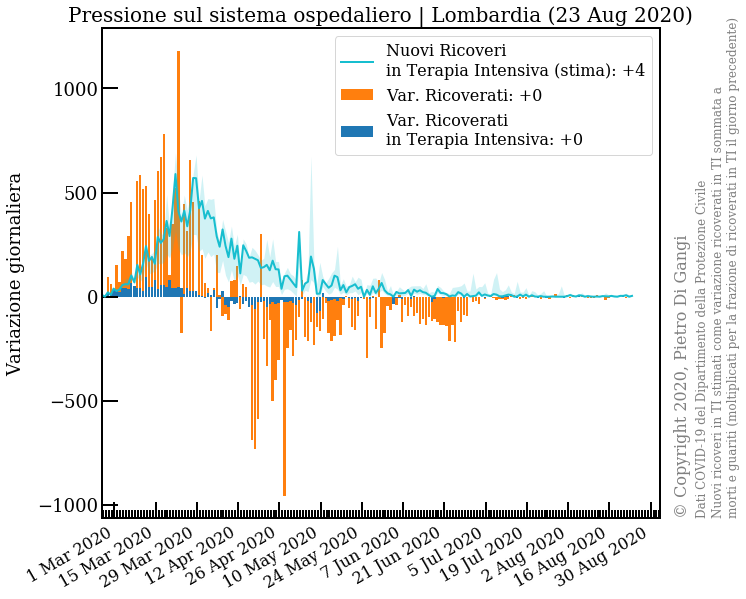

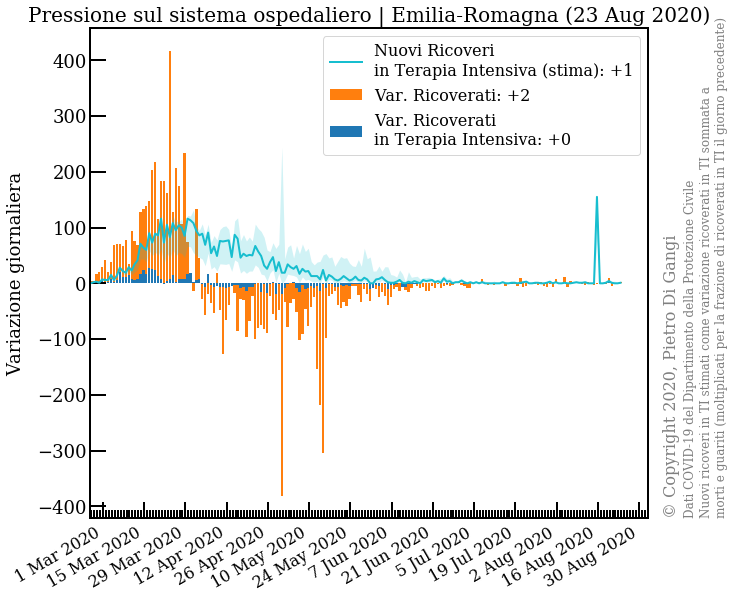

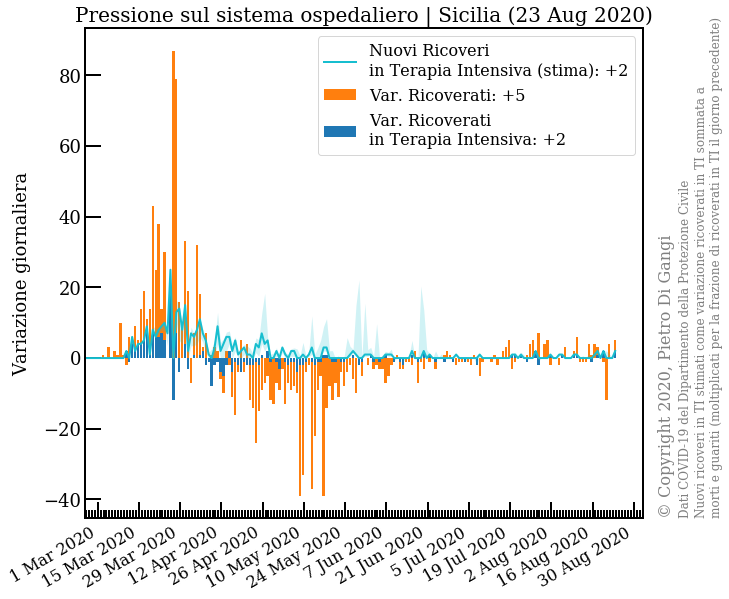

In [119]:
def icu(region, title='', dayspan=180):

    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
   
    df = data[data.region==region]
    df = df[df.date > lastday-timedelta(dayspan)]
    
    #ax.plot(df.date, df.new_cases, color='darkorange', label='Nuovi casi: +%d' % df.new_cases.iat[-1])
    #ax.plot(df.date, df.new_totale_positivi, color='gold', label='Nuovi attualmente positivi: +%d' % df.new_totale_positivi.iat[-1])
    #ax.plot(df.date, df.new_deaths, color='r', label='Morti: +%d' % df.new_deaths.iat[-1])
    #ax.plot(df.date, df.new_recovered, color='limegreen', label='Dimessi guariti: +%d' % df.new_recovered.iat[-1])
    if df.new_ricoverati_con_sintomi.iat[-1]<0: sign=''
    else: sign='+'
    ax.bar(df.date, df.new_ricoverati_con_sintomi, color='tab:orange', label='Var. Ricoverati: %s%d' % (sign,df.new_ricoverati_con_sintomi.iat[-1]))
        
    if df.new_terapia_intensiva.iat[-1]<0: sign=''
    else: sign='+'
    ax.bar(df.date, df.new_terapia_intensiva, color='tab:blue', label='Var. Ricoverati\nin Terapia Intensiva: %s%d' % (sign,df.new_terapia_intensiva.iat[-1]))

    ax.plot(df.date, df.new_terapia_intensiva_netta, color='tab:cyan', lw=2, label='Nuovi Ricoveri\nin Terapia Intensiva (stima): +%d' % df.new_terapia_intensiva_netta.iat[-1])
    ax.fill_between(df.date, df.new_terapia_intensiva_netta_max, df.new_terapia_intensiva_netta, lw=0, alpha=0.2, color='tab:cyan', zorder=100)
    ax.fill_between(df.date, df.new_terapia_intensiva_netta_min, df.new_terapia_intensiva_netta, lw=0, alpha=0.2, color='tab:cyan', zorder=100)

    
    plt.ylabel('Variazione giornaliera')
    #plt.yscale('log')
    ax.set_ylim()
    ax.set_xlim(left=lastday-timedelta(days=dayspan))
    ax.tick_params(axis='x', which='major', labelsize=16)
    
    ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=14))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%-d %b %Y'))
    fig.autofmt_xdate()
    plt.gcf().autofmt_xdate()
    
    #legend
    leg = plt.legend(loc=0, fontsize=16) 
    plt.title(title + ' (%s)' % lastday.strftime('%-d %b %Y'), fontsize=20)
    
    # disclaimer
    xlim = timedelta(days=dayspan)
    ylim = ax.get_ylim()
    text = '© Copyright 2020, Pietro Di Gangi'
    plt.text(lastday+timedelta(0)+0.08*xlim, ylim[0], text, rotation=90, verticalalignment='bottom', color='grey', fontsize=16)
    text = 'Dati COVID-19 del Dipartimento della Protezione Civile'
    plt.text(lastday+timedelta(0)+0.12*xlim, ylim[0], text, rotation=90, verticalalignment='bottom', color='grey', fontsize=12)
    text = 'Nuovi ricoveri in TI stimati come variazione ricoverati in TI sommata a\nmorti e guariti (moltiplicati per la frazione di ricoverati in TI il giorno precedente)'
    plt.text(lastday+timedelta(0)+0.15*xlim, ylim[0], text, rotation=90, verticalalignment='bottom', color='grey', fontsize=12)

    plt.show()
    

icu('Italia', 'Pressione sul sistema ospedaliero | Italia')
icu('Lombardia', 'Pressione sul sistema ospedaliero | Lombardia')
icu('Emilia-Romagna', 'Pressione sul sistema ospedaliero | Emilia-Romagna')
icu('Sicilia', 'Pressione sul sistema ospedaliero | Sicilia')

## Regioni
Andamento e valori complessivi nelle singole regioni

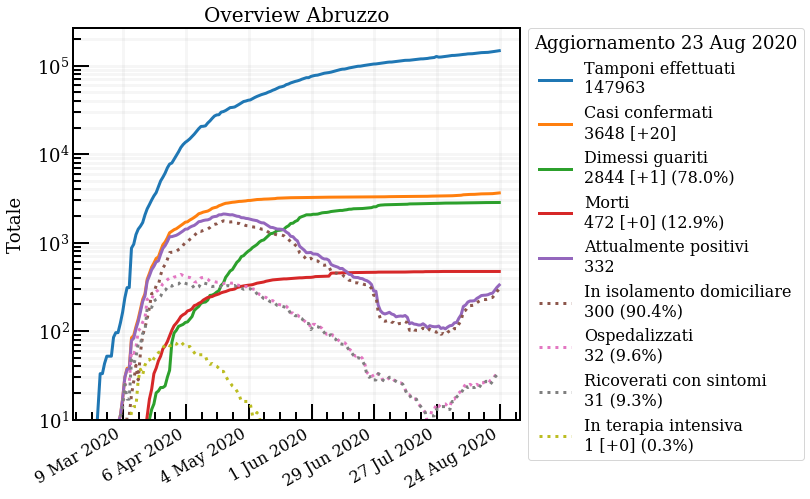

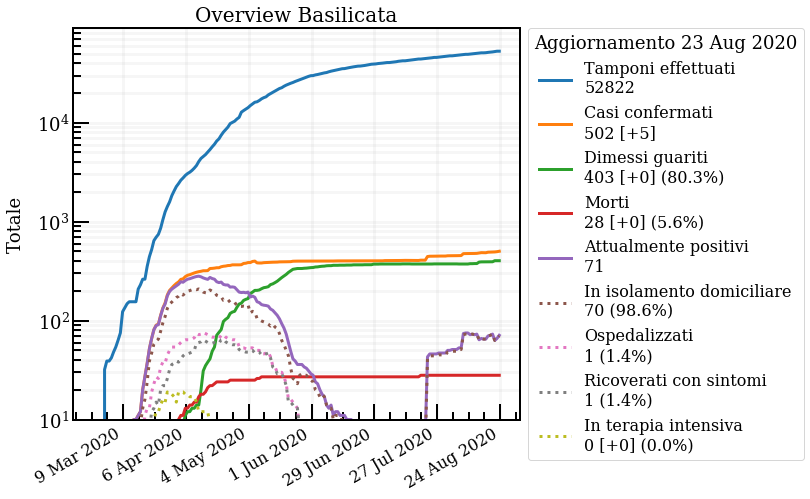

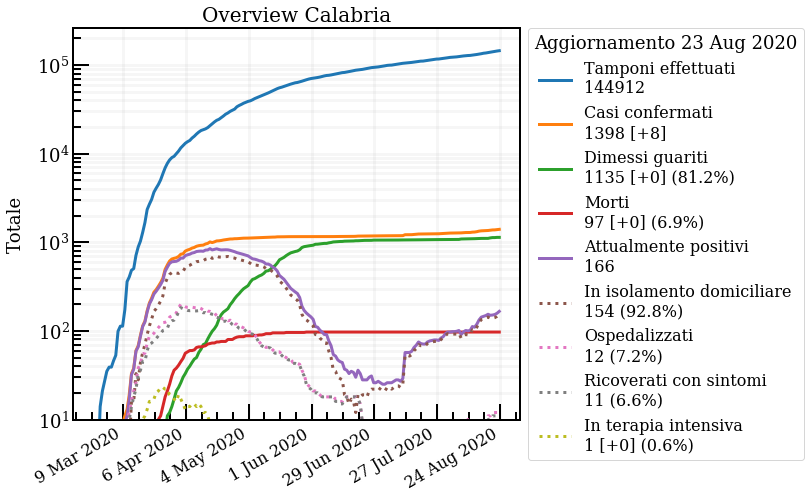

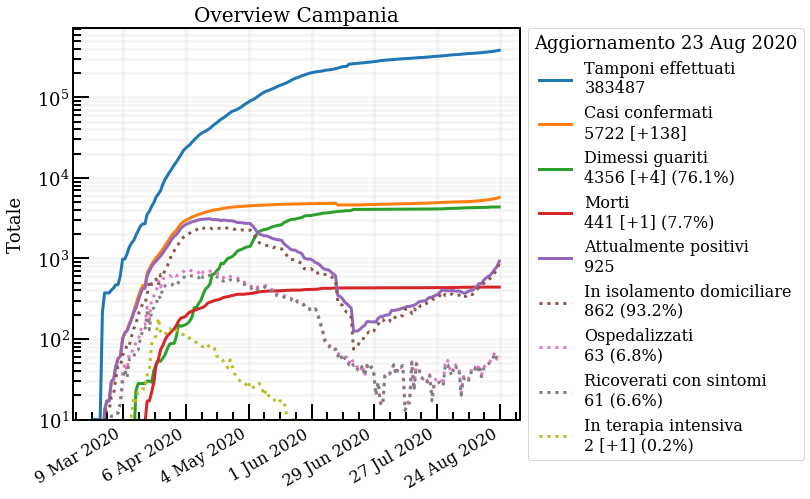

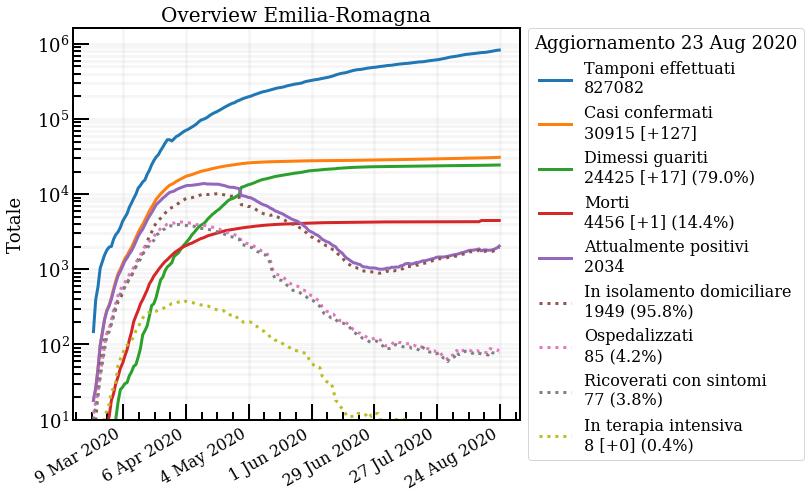

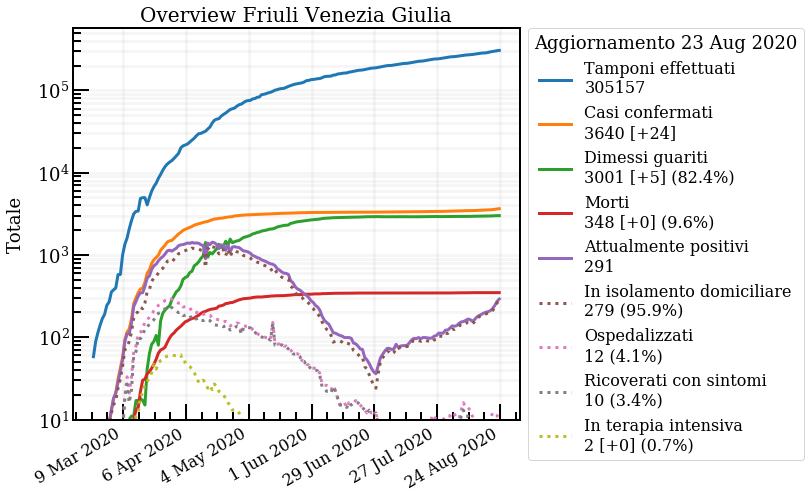

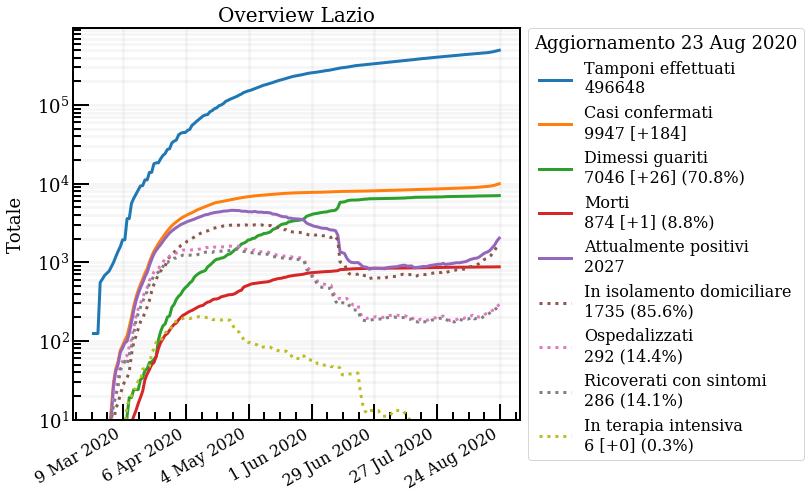

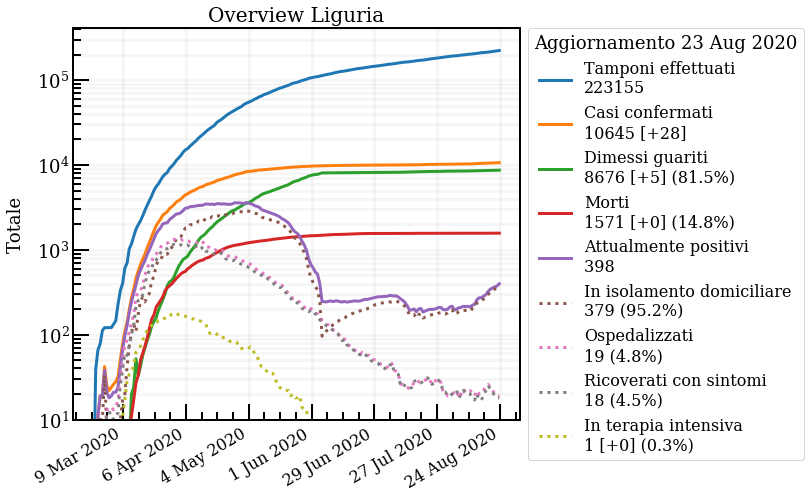

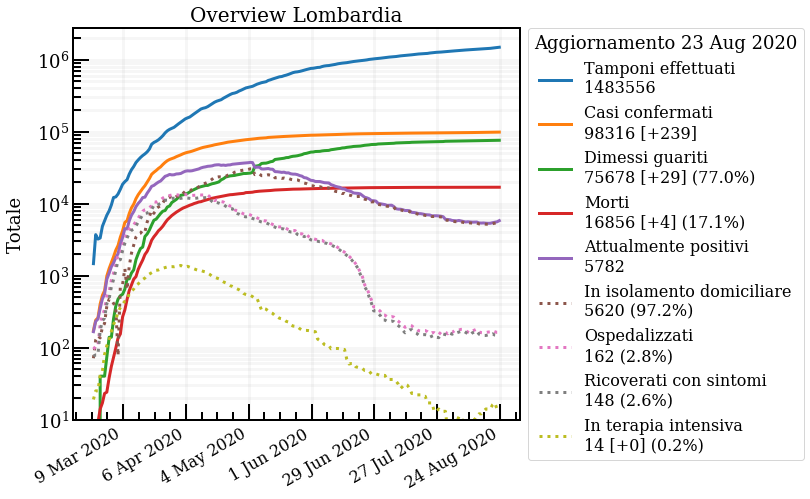

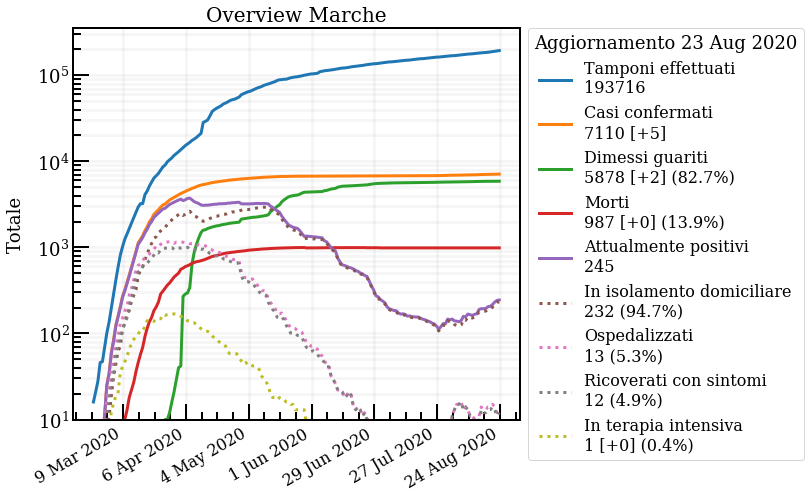

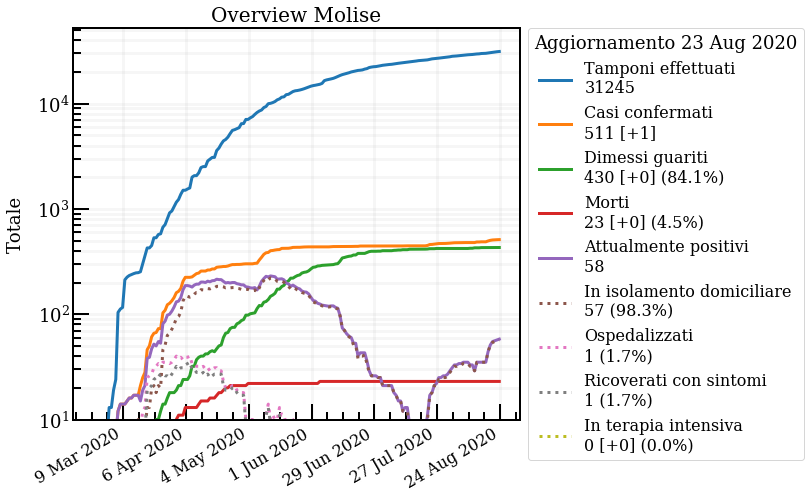

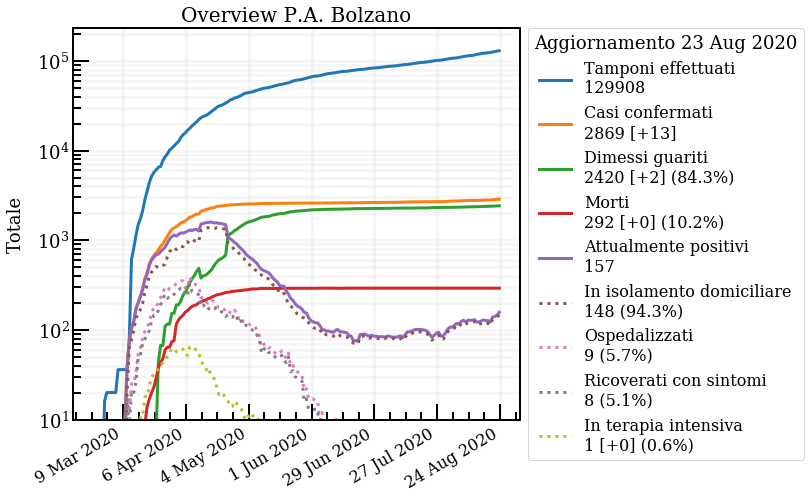

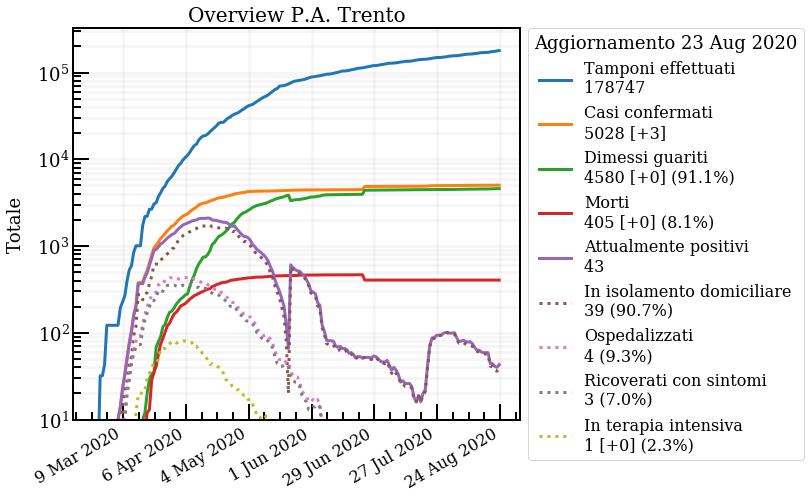

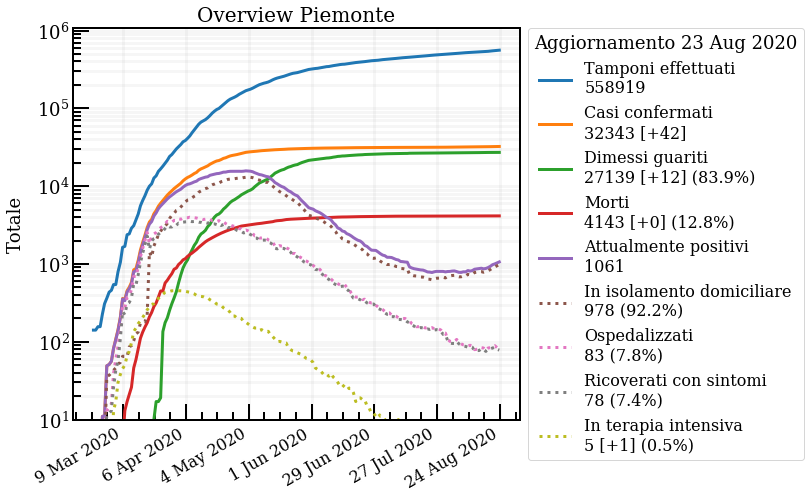

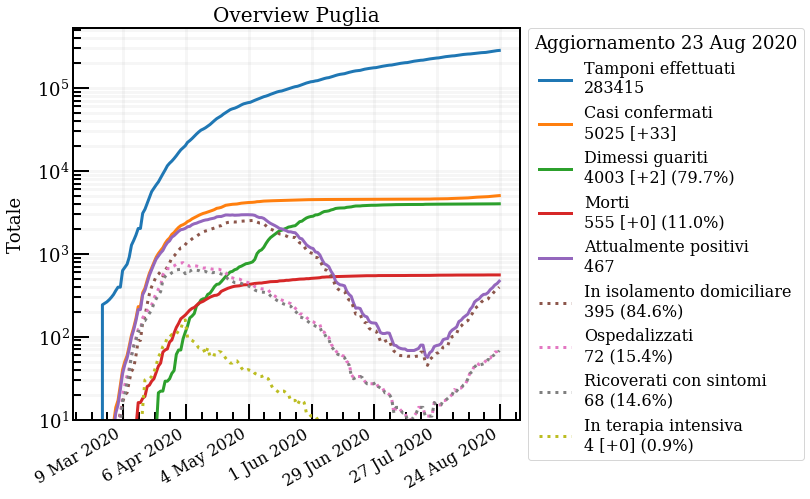

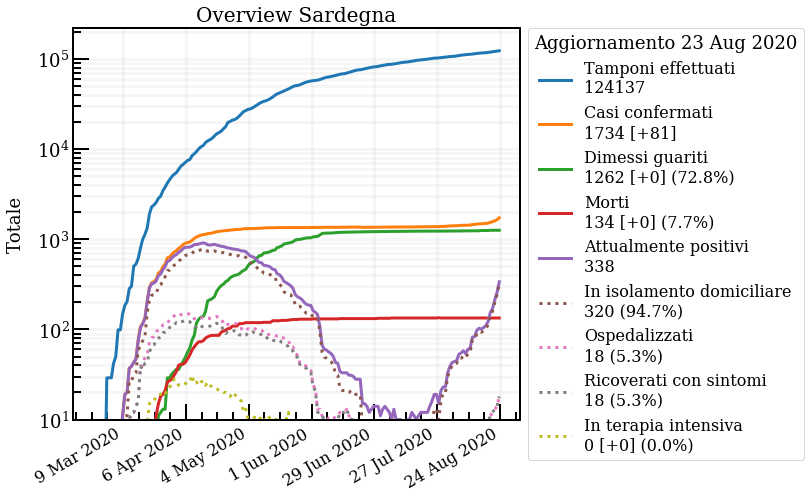

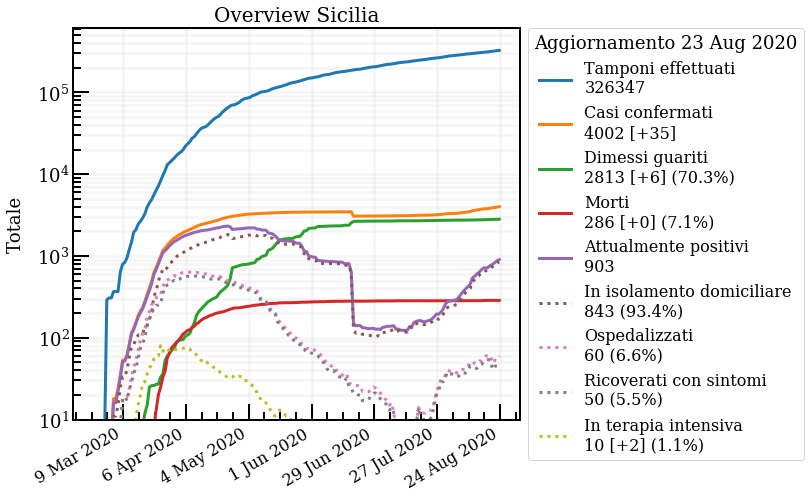

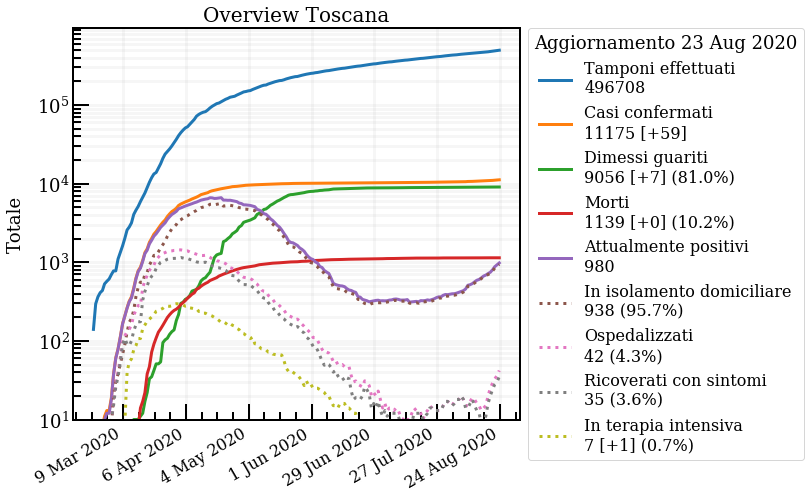

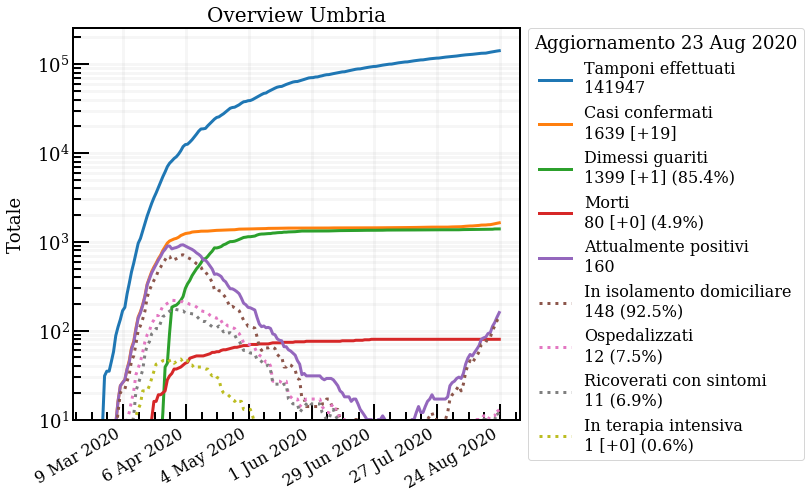

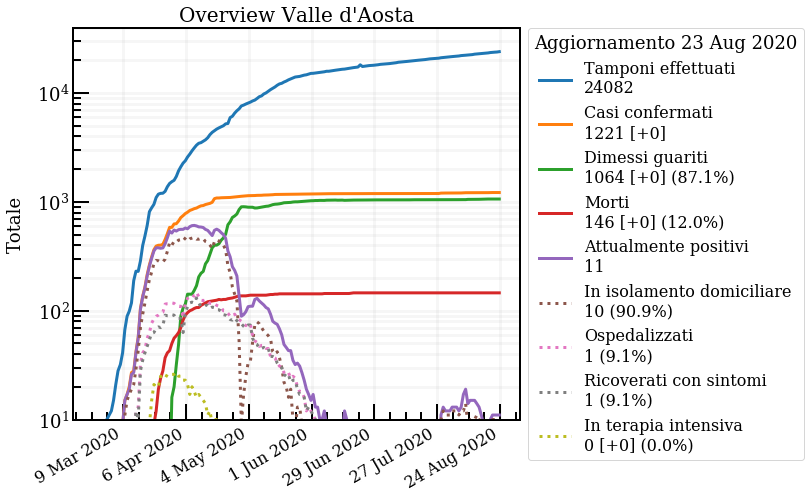

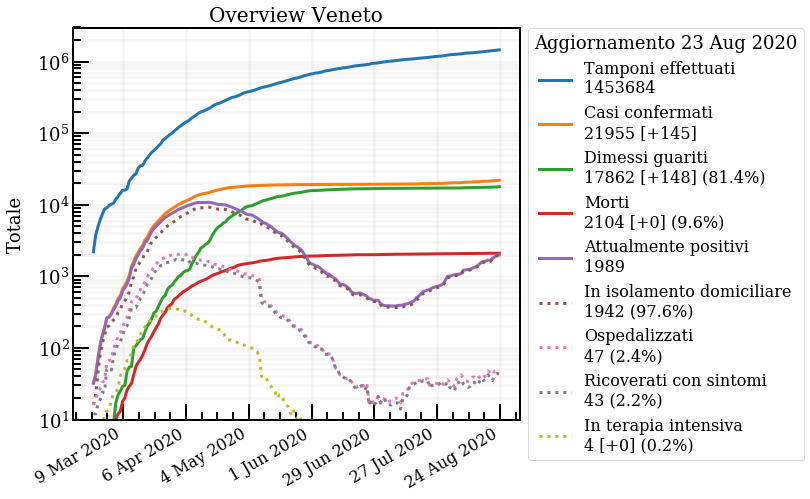

In [110]:
for regione in regioni['region'].unique():
    overview(regione, 'Overview '+regione)

# 2D Trail Plots
Tracciamento dell'evoluzione dei dati (due variabili) tramite scie di punti in grafici 2D.
L'evoluzione dei singoli parametri e' proiettata nei pannelli inferiore e sinistro.

**Come interpretare il grafico:**
* Punti piu' trasparenti corrispondono a giorni precedenti
* La coppia di valori alla data attuale e' mostrata da un punto colorato (zero trasparenza)
* Una maggiore distanza fra i punti (lungo uno degli assi o entrambi) indica una maggiore rapidita' di evoluzione del dato su base giornaliera.
* I valori numerici indicano il valore assoluto raggiunto e l'aumento giornaliero (tra parentesi).


## Casi confermati - Morti

In [111]:
def guideline(ax, xlim=(0,1), ylim=(0,1), m=1, label=''):
    xmin = xlim[0]
    xmax = xlim[1]
    ymin = ylim[0]
    ymax = ylim[1]
    ax.plot((0,1.5*xmax), (0,m*1.5*xmax), ls='--', lw=1, color='silver', zorder=-100)

    mplot = (ymax-ymin)/(xmax-xmin)
    if m < mplot:
        coord = [0.85*xmax, 0.85*xmax*m]
    else:
        coord = [0.85*ymax/m, 0.85*ymax]
    label = '%.f%s ' % (m*100, '%') + label
    ax.text(coord[0], coord[1], label, color='silver', fontsize=12, rotation=np.rad2deg(np.arctan(m/mplot*2/3)), ha='center', va='center', backgroundcolor='w', zorder=-100)

def trailplot(regions, ndays, varx, vary, title, xlabel, ylabel, guidelines, gl_label):
    sorted_df = data[data.region.isin(regions)][data.date==lastday].sort_values(varx+'_per100k')
    regions = sorted_df.region.unique()

    # Set up the axes with gridspec
    fig = plt.figure(figsize=(14,14))
    grid = plt.GridSpec(2, 3, hspace=0., wspace=0.)
    ax = fig.add_subplot(grid[:-1, 1:])
    y_ax = fig.add_subplot(grid[:-1, 0], xticks=[], sharey=ax)
    x_ax = fig.add_subplot(grid[-1, 1:], sharex=ax)
    x_ax.tick_params(axis='y', which='major', labelsize=14)

    # axes
    y_ax.set_ylabel(ylabel+' per 100 000 abitanti')
    x_ax.set_xlabel(xlabel+' per 100 000 abitanti')

    # plot curves
    days = np.arange(1,ndays)
    mk = 'o'
    ms=100
    #dummy points
    #x_ax.scatter(0,'',label='', color='w')
    y_ax.scatter('',0,label='', color='w')

    cmap = plt.get_cmap('nipy_spectral')
    for i,reg in enumerate(regions):
        color = cmap(i/len(regions))
        df = data[data.region==reg]

        for day in list(reversed(days)):
            x = df[varx+'_per100k'].iat[-day] # total value 'day' ago
            y = df[vary+'_per100k'].iat[-day]
            alpha = 1./day
            ax.scatter(x,y,label='', color=color, marker=mk, s=ms, alpha=alpha)
            x_ax.scatter(x,reg,label='', color=color, marker=mk, s=ms, alpha=alpha)
            y_ax.scatter(reg,y,label='', color=color, marker=mk, s=ms, alpha=alpha)
        #x_ax.text(x+0.03*xlim[1], reg, '%d (+%d)' % (df[varx].iat[-1], df['new_'+varx].iat[-1]), ha='left', va='center', fontsize=12)
        #y_ax.text(reg, y+0.03*ylim[1], '%d (+%d)' % (df[vary].iat[-1], df['new_'+vary].iat[-1]), ha='center', va='bottom', fontsize=10, rotation=90)

        
    # guidelines
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    x_ax.set_xlim(xlim)
    y_ax.set_ylim(ylim)
    
    for m in guidelines:
        guideline(ax=ax, xlim=xlim, ylim=ylim, m=m, label=gl_label)
        
    # disclaimer
    text = '© Copyright 2020, Pietro Di Gangi'
    x_ax.text(0.9*xlim[1], 0, text, rotation=90, verticalalignment='bottom', color='grey', fontsize=14)
    text = 'Dati COVID-19 del Dipartimento della Protezione Civile'
    x_ax.text(0.935*xlim[1], 0, text, rotation=90, verticalalignment='bottom', color='grey', fontsize=11)
    text = 'Dati popolazione italiana ISTAT (01/01/2019)'
    x_ax.text(0.96*xlim[1], 0, text, rotation=90, verticalalignment='bottom', color='grey', fontsize=11)

        
    #ax.grid(axis='x', linewidth=3, alpha=0.1, which='both')
    #x_ax.grid(axis='x', linewidth=3, alpha=0.1, which='both')
    #ax.grid(axis='y', linewidth=3, alpha=0.1, which='both')
    #y_ax.grid(axis='y', linewidth=3, alpha=0.1, which='both')

    ax.set_title(title + ' | Ultimi %d giorni (%s)' % (ndays, lastday.strftime('%-d %b %Y')), ha='center')

    plt.show()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


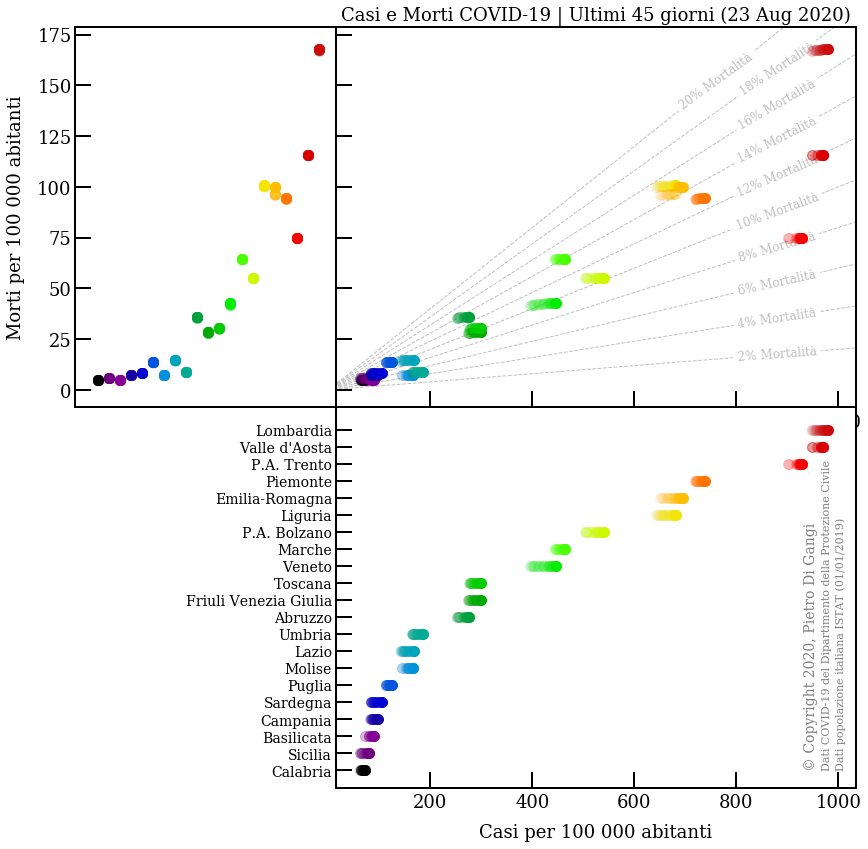

In [112]:
# Casi vs Morti
trailplot(regions=regioni.region.unique(), ndays=45,
          varx='cases', vary='deaths', title='Casi e Morti COVID-19', xlabel='Casi', ylabel='Morti',
          guidelines=[0.2,0.18,0.16,0.14,0.12,0.1,0.08,0.06,0.04,0.02], gl_label='Mortalità',
         )

## Tamponi effettuati - Casi di positivita' 

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


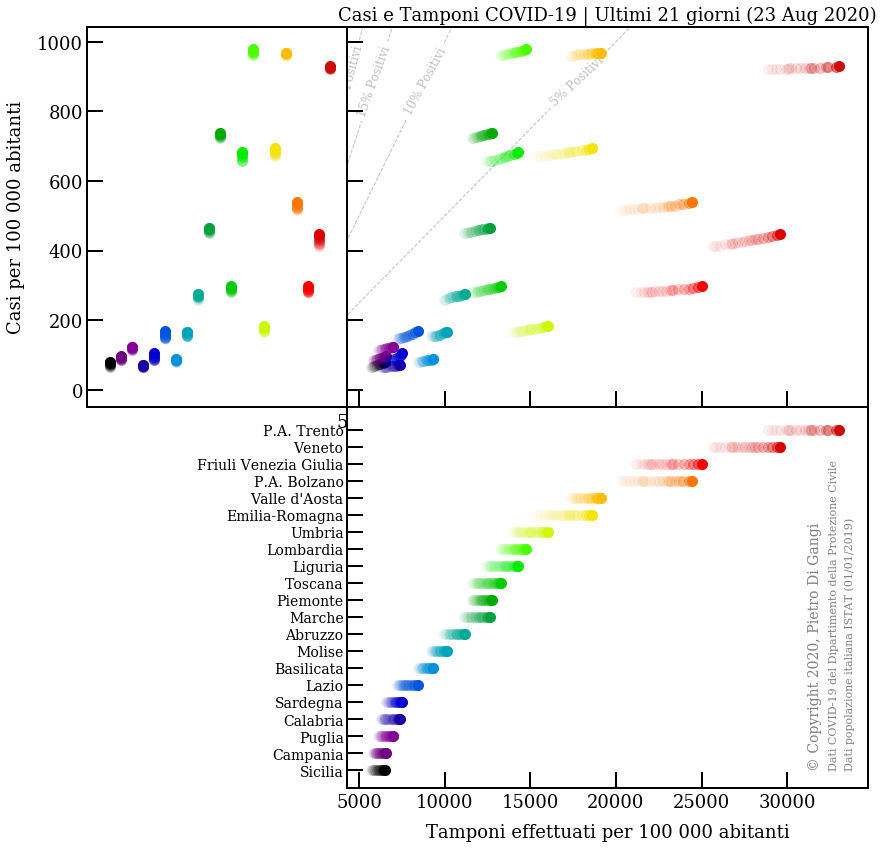

In [113]:
# Casi vs Tamponi
trailplot(regions=regioni.region.unique(), ndays=21,
          varx='tests', vary='cases', title='Casi e Tamponi COVID-19', ylabel='Casi', xlabel='Tamponi effettuati',
          guidelines=[0.5,0.4,0.3,0.25,0.2,0.15,0.1,0.05], gl_label='Positivi',
         )

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


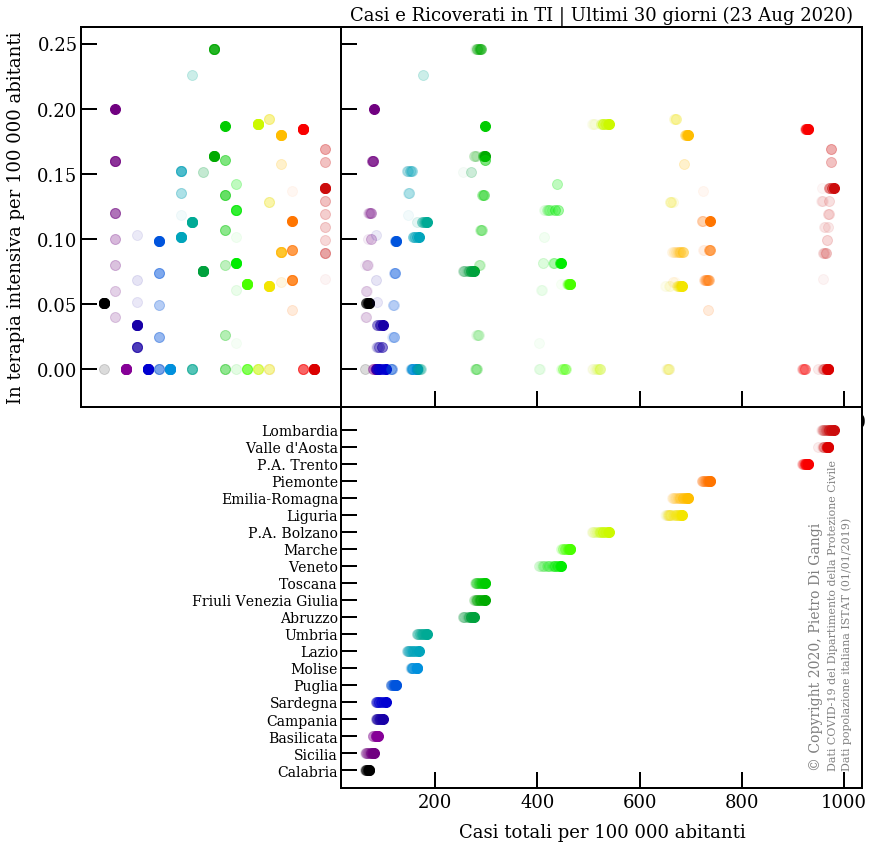

In [114]:
trailplot(regions=regioni.region.unique(), ndays=30,
          varx='cases', vary='terapia_intensiva', title='Casi e Ricoverati in TI', ylabel='In terapia intensiva', xlabel='Casi totali',
          guidelines=[], gl_label='',
         )

## Casi positivi - Casi in terapia intensiva
Evoluzione dei casi positivi (totale) e ricoveri in terapia intensiva (attuale) per regione.

**Effetto della neutralizzazione del virus:**
* Nessun avanzamento lungo l'asse dei casi totali
* Caduta dei punti verso lo zero dell'asse dei casi in terapia intensiva

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


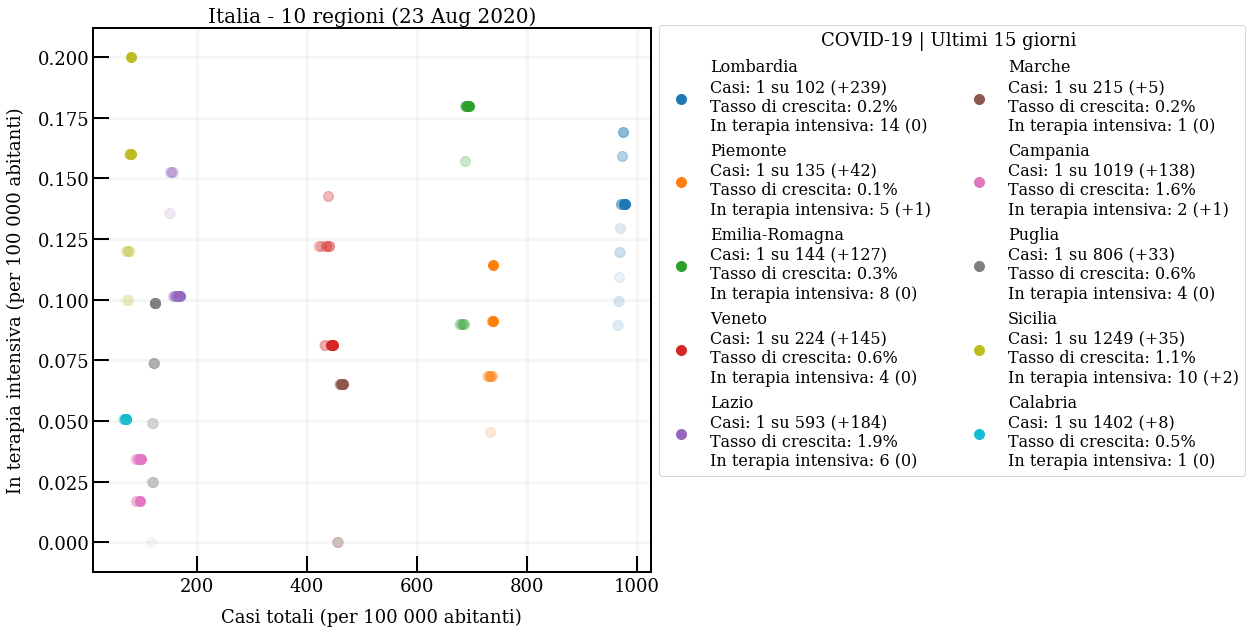

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


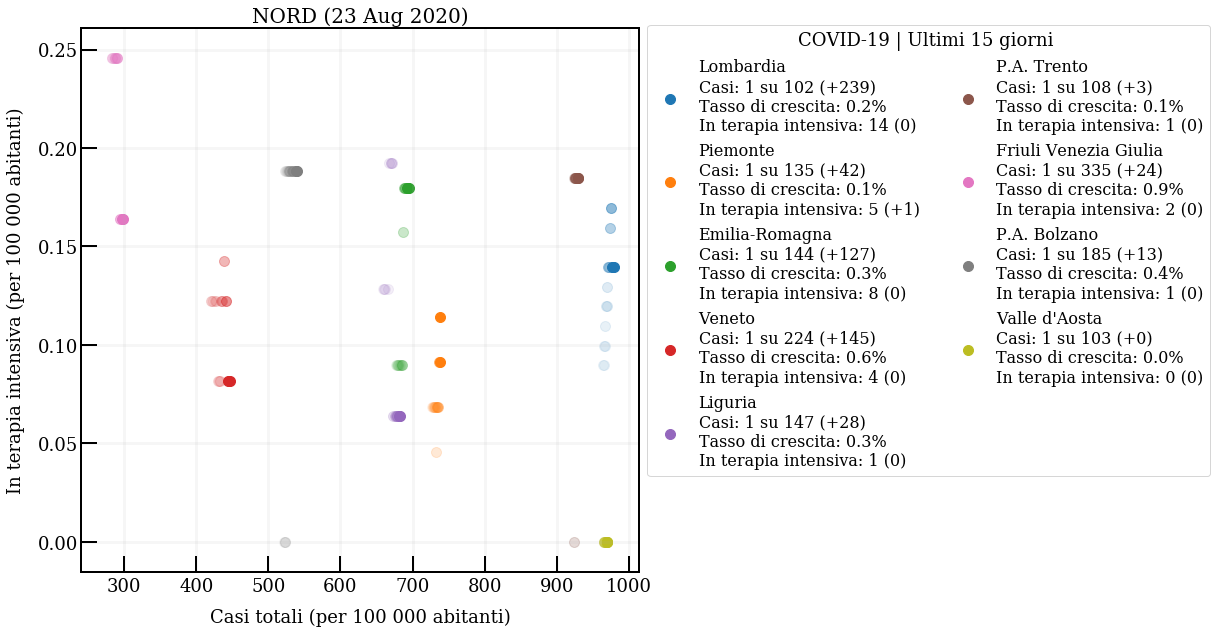

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


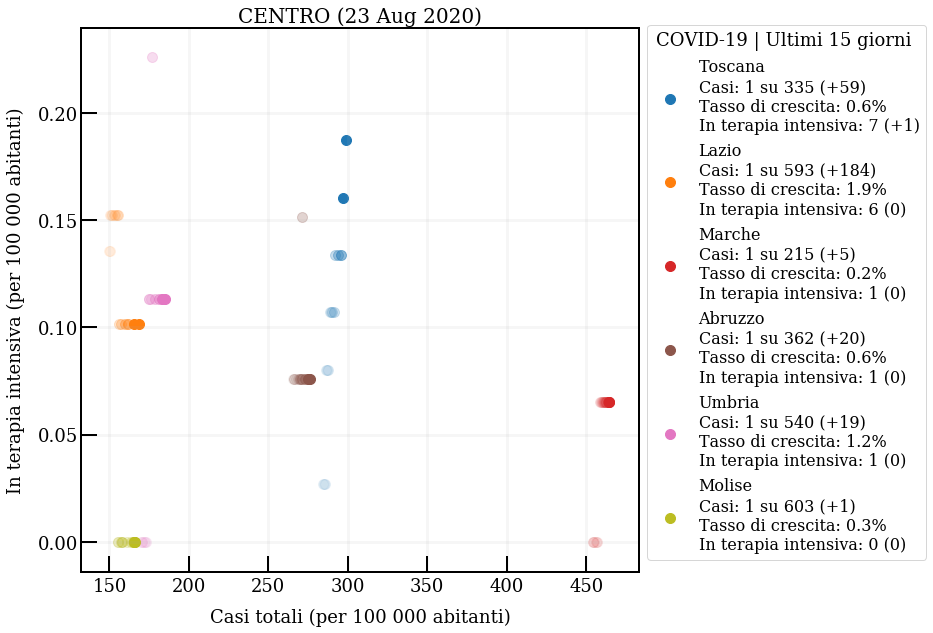

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


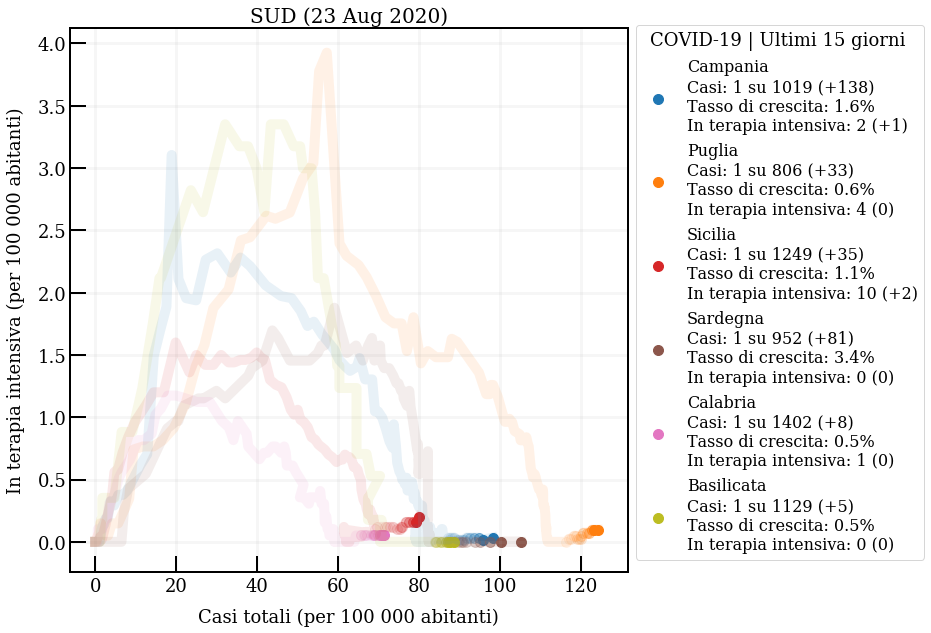

In [115]:
def pointevo_cases_icu(regions, dayspan, title='', line=False):
    vary = 'terapia_intensiva'
    varx = 'cases'
    regions = sorted_set(regions, 'cases')
    N = len(regions)
    cm = plt.get_cmap('tab10')

    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)

    # plot curves
    ndays = dayspan
    days = np.arange(1,ndays)
    mk = 'o'
    ms=100

    for i,reg in enumerate(regions):
        df = data[data.region==reg]
        pop = df.population.iat[0]
        totx = df[varx].iat[-1]
        toty = df[vary].iat[-1]
        normalization = pop/1e5

        lb = '%s\nCasi: 1 su %.f (+%.f)' % (reg, pop/df.cases.iat[-1], df.new_cases.iat[-1])
        lb = lb + '\nTasso di crescita: %.1f%s' % (df.cases_delta3.iat[-1]*100, '%')
        sign = '+'
        if df.new_terapia_intensiva.iat[-1]<=0: sign=''
        lb = lb + '\nIn terapia intensiva: %d (%s%.f)' % (df.terapia_intensiva.iat[-1], sign, df.new_terapia_intensiva.iat[-1])
        if line:
            ax.plot(df[varx]/normalization, df[vary]/normalization, label='', color=cm(1.*i/N), lw=10, alpha=0.1)
        ax.scatter(df[varx].iat[-1]/normalization, df[vary].iat[-1]/normalization, label=lb, color=cm(1.*i/N), marker=mk, s=ms)

        for day in list(reversed(days)):
            x = df[varx].iat[-1-day]/normalization # total value 'day' ago
            y = df[vary].iat[-1-day]/normalization
            alpha = 1/day
            ax.scatter(x,y,label='', color=cm(1.*i/N), marker=mk, s=ms, alpha=alpha)

    plt.ylabel('In terapia intensiva (per 100 000 abitanti)')
    plt.xlabel('Casi totali (per 100 000 abitanti)')
    plt.grid(axis='x', linewidth=3, alpha=0.1, which='both')
    plt.grid(axis='y', linewidth=3, alpha=0.1, which='both')
    
    #plt.text(0, ax.get_ylim()[1]*0.95, title, fontsize=24, horizontalalignment='left')
    #legend
    leg = plt.legend(loc='upper left', ncol=int(N/7)+1, bbox_to_anchor=(1.,1.02), 
                     title='COVID-19 | Ultimi %d giorni ' % ndays)
    plt.title(title+' (%s)' % lastday.strftime('%-d %b %Y'), fontsize=20)

    plt.show()
    
    
regions = ['Lombardia', 'Emilia-Romagna', 'Marche', 'Piemonte', 'Veneto', 'Puglia', 'Lazio', 'Sicilia', 'Calabria', 'Campania']
pointevo_cases_icu(regions,15, 'Italia - 10 regioni', 0)
regions = nord
pointevo_cases_icu(regions,15, 'NORD', 0)
regions = centro
pointevo_cases_icu(regions,15, 'CENTRO', 0)
regions = sud
pointevo_cases_icu(regions,15, 'SUD', 1)